# Food Desert Investigation -- Data Wrangling and Cleaning

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I am going to use Pandas DataFrames to work with the csv files I've downloaded.

### State and County Data

I am filtering the StateAndCountyData to save the columns from 2016. I am doing this because all of the food data is from 2016. I will utilize other datasets to supplement this data with demographic data.

In [2]:
file_food_atlas = 'StateAndCountyData.csv'
data_state_county = pd.read_csv(file_food_atlas)
data_state_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga,LACCESS_POP10,18428.439690
1,1001,AL,Autauga,LACCESS_POP15,17496.693040
2,1001,AL,Autauga,PCH_LACCESS_POP_10_15,-5.056026
3,1001,AL,Autauga,PCT_LACCESS_POP10,33.769657
4,1001,AL,Autauga,PCT_LACCESS_POP15,32.062255


In [3]:
filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(16)$')]

/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/3569536789.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = data_state_county[data_state_county['Variable_Code'].str.contains('(16)$')]


In [4]:
filtered_df.head()

,FIPS,State,County,Variable_Code,Value
128276,1001,AL,Autauga,GROC16,3.000000
128277,1001,AL,Autauga,PCH_GROC_11_16,-40.000000
128279,1001,AL,Autauga,GROCPTH16,0.054271
128280,1001,AL,Autauga,PCH_GROCPTH_11_16,-40.085748
128282,1001,AL,Autauga,SUPERC16,1.000000


In [5]:
filtered_df['County'] = filtered_df['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['County'] = filtered_df['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_df['County'] = filtered_df['County'].str.strip() # Remove leading and trailing spaces
filtered_df['County'] = filtered_df['County'].str.lower() # Convert to lowercase

/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/3599340196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/3599340196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
/var/folders/d7/365gnrk10q72fy9l

In [6]:
filtered_df['State'] = filtered_df.loc[:, 'State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_df['State'] = filtered_df['State'].str.strip() # Remove leading and trailing spaces
filtered_df['State'] = filtered_df['State'].str.upper() # Convert to uppercase

/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/3646267976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['State'] = filtered_df.loc[:, 'State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/3646267976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['State'] = filtered_df['State'].str.strip() # Remove leading and trailing spaces
/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipyk

In [7]:
pivot_df = filtered_df.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()

In [8]:
pivot_df.head()

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
0,1,AL,total,59447.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4864745.0,NaN,NaN,1.291599e+05
1,2,AK,total,10039.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,741504.0,NaN,NaN,1.912092e+04
2,4,AZ,total,42618.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6945452.0,NaN,NaN,1.639978e+05
3,5,AR,total,66903.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2990410.0,NaN,NaN,8.055467e+04
4,6,CA,total,595088.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39209127.0,NaN,NaN,1.174875e+06


### County Data

In [9]:
# Importing County Dataset
file_county_data = 'SupplementalDataCounty.csv'
data_county = pd.read_csv(file_county_data)
data_county.head()

,FIPS,State,County,Variable_Code,Value
0,1001,AL,Autauga County,2010_Census_Population,54571
1,1001,AL,Autauga County,Population_Estimate_2011,55208
2,1001,AL,Autauga County,Population_Estimate_2012,54936
3,1001,AL,Autauga County,Population_Estimate_2013,54713
4,1001,AL,Autauga County,Population_Estimate_2014,54876


In [10]:
filtered_counties = data_county[data_county['Variable_Code'].str.contains('(16)$')]

filtered_counties['County'] = filtered_counties['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_counties['County'] = filtered_counties['County'].str.replace('County', '') # Remove 'County' word, only present sometimes
filtered_counties['County'] = filtered_counties['County'].str.strip() # Remove leading and trailing spaces
filtered_counties['County'] = filtered_counties['County'].str.lower() # Convert to lowercase

filtered_counties['State'] = filtered_counties['State'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
filtered_counties['State'] = filtered_counties['State'].str.strip() # Remove leading and trailing spaces
filtered_counties['State'] = filtered_counties['State'].str.upper() # Convert to lowercase

counties = filtered_counties.pivot_table(index=['FIPS', 'State', 'County'], columns='Variable_Code', values='Value').reset_index()
counties.head()

/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/208533991.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_counties = data_county[data_county['Variable_Code'].str.contains('(16)$')]
/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/208533991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_counties['County'] = filtered_counties['County'].str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation
/var/folders/d7/365gnrk10q72fy9l9_q_hft80000gn/T/ipykernel_3943/208533991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Variable_Code,FIPS,State,County,Population_Estimate_2016
0,1001,AL,autauga,55242
1,1003,AL,baldwin,207712
2,1005,AL,barbour,25819
3,1007,AL,bibb,22576
4,1009,AL,blount,57517


In [11]:
counties = counties.drop(['State','County'], axis=1)

In [12]:
counties.head()

Variable_Code,FIPS,Population_Estimate_2016
0,1001,55242
1,1003,207712
2,1005,25819
3,1007,22576
4,1009,57517


## Exploring pivot_df

In [13]:
pivot_df.head()

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
0,1,AL,total,59447.50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4864745.0,NaN,NaN,1.291599e+05
1,2,AK,total,10039.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,741504.0,NaN,NaN,1.912092e+04
2,4,AZ,total,42618.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6945452.0,NaN,NaN,1.639978e+05
3,5,AR,total,66903.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2990410.0,NaN,NaN,8.055467e+04
4,6,CA,total,595088.25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39209127.0,NaN,NaN,1.174875e+06


In [14]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3328 non-null   int64  
 1   State                     3328 non-null   object 
 2   County                    3328 non-null   object 
 3   CACFP_PART_2016           51 non-null     float64
 4   CONVS16                   3143 non-null   float64
 5   CONVSPTH16                3143 non-null   float64
 6   FFR16                     3143 non-null   float64
 7   FFRPTH16                  3143 non-null   float64
 8   FSR16                     3143 non-null   float64
 9   FSRPTH16                  3143 non-null   float64
 10  GROC16                    3143 non-null   float64
 11  GROCPTH16                 3143 non-null   float64
 12  NSLP_PART_2016            51 non-null     float64
 13  PCH_CONVSPTH_11_16        3122 non-null   float64
 14  PCH_CONV

In [15]:
pivot_df.describe()

Variable_Code,FIPS,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,GROC16,GROCPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
count,3328.000000,51.000000,3143.00000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.0,3143.000000,3143.000000,3143.000000,3143.000000,5.100000e+01,2985.000000,2982.000000,5.100000e+01
mean,29764.681490,85921.333333,40.35762,0.595571,75.696787,0.584822,78.551066,0.775831,20.807827,0.243835,...,84.001372,1.0,7.458479,0.055450,1.782055,0.018255,6.334732e+06,14.577889,0.217240,1.474524e+05
std,15635.421817,118749.706301,97.01666,0.304968,268.845823,0.307703,269.993476,0.567851,90.196535,0.216536,...,9.223259,0.0,29.697479,0.075095,4.310650,0.022460,7.242171e+06,48.084899,0.191315,2.065493e+05
min,1.000000,7532.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,56.037000,1.0,0.000000,0.000000,0.000000,0.000000,5.842900e+05,1.000000,0.004938,1.078283e+04
25%,18110.500000,19351.875000,7.00000,0.401678,5.000000,0.418769,7.000000,0.495050,2.000000,0.132983,...,76.151000,1.0,0.000000,0.000000,0.000000,0.000000,1.756930e+06,2.000000,0.114667,3.856721e+04
50%,29072.000000,49185.750000,15.00000,0.542005,15.000000,0.588565,18.000000,0.672495,5.000000,0.186116,...,84.002000,1.0,1.000000,0.042268,1.000000,0.014654,4.438229e+06,5.000000,0.165353,1.001519e+05
75%,45067.500000,90559.125000,35.00000,0.722071,45.000000,0.748136,48.000000,0.894307,12.000000,0.279887,...,90.379000,1.0,4.000000,0.079363,1.500000,0.029268,7.120066e+06,10.000000,0.247699,1.515955e+05
max,56045.000000,595088.250000,2199.00000,3.680982,8264.000000,5.805515,8113.000000,11.611030,2495.000000,3.267974,...,100.000000,1.0,787.000000,1.095690,97.000000,0.250752,3.920913e+07,1188.000000,3.262643,1.174875e+06


In [16]:
pivot_df.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2016', 'CONVS16', 'CONVSPTH16',
       'FFR16', 'FFRPTH16', 'FSR16', 'FSRPTH16', 'GROC16', 'GROCPTH16',
       'NSLP_PART_2016', 'PCH_CONVSPTH_11_16', 'PCH_CONVS_11_16',
       'PCH_FFRPTH_11_16', 'PCH_FFR_11_16', 'PCH_FSRPTH_11_16',
       'PCH_FSR_11_16', 'PCH_GROCPTH_11_16', 'PCH_GROC_11_16',
       'PCH_PC_WIC_REDEMP_11_16', 'PCH_RECFACPTH_11_16', 'PCH_RECFAC_11_16',
       'PCH_REDEMP_WICS_11_16', 'PCH_SPECSPTH_11_16', 'PCH_SPECS_11_16',
       'PCH_SUPERCPTH_11_16', 'PCH_SUPERC_11_16', 'PCH_WICINFANTCHILD_14_16',
       'PCH_WICSPTH_11_16', 'PCH_WICS_11_16', 'PCH_WICWOMEN_14_16',
       'PCT_WICINFANTCHILD16', 'PCT_WICWOMEN16', 'PC_WIC_REDEMP16',
       'Population_Estimate_2016', 'RECFAC16', 'RECFACPTH16', 'REDEMP_WICS16',
       'SBP_PART_2016', 'SFSP_PART_2016', 'SNAP_BBCE16', 'SNAP_CAP16',
       'SNAP_OAPP16', 'SNAP_PART_RATE16', 'SNAP_REPORTSIMPLE16', 'SPECS16',
       'SPECSPTH16', 'SUPERC16', 'SUPERCPTH16', 'State_Population_2

In [17]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2016             float64
CONVS16                     float64
CONVSPTH16                  float64
FFR16                       float64
FFRPTH16                    float64
FSR16                       float64
FSRPTH16                    float64
GROC16                      float64
GROCPTH16                   float64
NSLP_PART_2016              float64
PCH_CONVSPTH_11_16          float64
PCH_CONVS_11_16             float64
PCH_FFRPTH_11_16            float64
PCH_FFR_11_16               float64
PCH_FSRPTH_11_16            float64
PCH_FSR_11_16               float64
PCH_GROCPTH_11_16           float64
PCH_GROC_11_16              float64
PCH_PC_WIC_REDEMP_11_16     float64
PCH_RECFACPTH_11_16         float64
PCH_RECFAC_11_16            float64
PCH_REDEMP_WICS_11_16       float64
PCH_SPECSPTH_11_16          float64
PCH_SPECS_11_16             float64
PCH_SUPERCPTH_

## Cleaning

### Null values

In [18]:
pivot_df.isna()

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3324,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3325,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3326,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [19]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
WIC_PART_2016               3277
SBP_PART_2016               3277
NSLP_PART_2016              3277
CACFP_PART_2016             3277
State_Population_2016       3277
SFSP_PART_2016              3277
PCH_PC_WIC_REDEMP_11_16     1520
PC_WIC_REDEMP16             1471
PCH_SPECS_11_16              435
PCH_SPECSPTH_11_16           432
PCH_WICSPTH_11_16            347
WICSPTH16                    346
PCH_REDEMP_WICS_11_16        345
PCH_WICS_11_16               344
REDEMP_WICS16                343
WICS16                       343
PCH_RECFAC_11_16             328
PCH_RECFACPTH_11_16          328
PCH_SUPERC_11_16             318
PCH_SUPERCPTH_11_16          317
PCH_FFR_11_16                242
PCH_FFRPTH_11_16             237
PCH_FSR_11_16                213
PCH_CONVS_11_16              211
PCH_FSRPTH_11_16             208
PCH_GROC_11_16               206
PCH_CONVSPTH_11_16           206
PCH_GROCPTH_11_16            201
Population_Estimate_2016     186
SNAP_REPORTSIMPLE16          

In [20]:
missing_sum = pivot_df.isnull().sum()
missing_percent = 100 * pivot_df.isnull().mean()
missing = pd.concat([missing_sum, missing_percent], axis=1)
missing = missing.sort_values([0, 1], ascending=False)

missing = missing.rename(columns = {1:'Percent'})
missing = missing.rename(columns = {0:'Sum'})

missing[missing.Percent > 50]

,Sum,Percent
Variable_Code,,
CACFP_PART_2016,3277,98.467548
NSLP_PART_2016,3277,98.467548
SBP_PART_2016,3277,98.467548
SFSP_PART_2016,3277,98.467548
State_Population_2016,3277,98.467548
WIC_PART_2016,3277,98.467548


The above columns ('CACFP_PART_2016', 'NSLP_PART_2016', 'SBP_PART_2016', 'SFSP_PART_2016', 'State_Population_2016', 'WIC_PART_2016') are all state totals. Instead of dropping these columns, I am going to input the state total for every county in the state. This will allow me to keep these columns as part of the data.

In [21]:
def fill_missing(df, col):
    state_total = df.groupby("State")[col].sum().to_dict()
    df[col] = df[col].fillna(df["State"].map(state_total))
    return df[col]

fill_missing(pivot_df, 'CACFP_PART_2016')

0        59447.50
1        10039.00
2        42618.00
3        66903.00
4       595088.25
          ...    
3323      7532.75
3324      7532.75
3325      7532.75
3326      7532.75
3327      7532.75
Name: CACFP_PART_2016, Length: 3328, dtype: float64

In [22]:
# Checking my method. It works!
pivot_df[pivot_df['State']=='AK']['CACFP_PART_2016']

1      10039.0
118    10039.0
119    10039.0
120    10039.0
121    10039.0
122    10039.0
123    10039.0
124    10039.0
125    10039.0
126    10039.0
127    10039.0
128    10039.0
129    10039.0
130    10039.0
131    10039.0
132    10039.0
133    10039.0
134    10039.0
135    10039.0
136    10039.0
137    10039.0
138    10039.0
139    10039.0
140    10039.0
141    10039.0
142    10039.0
143    10039.0
144    10039.0
145    10039.0
146    10039.0
147    10039.0
148    10039.0
149    10039.0
150    10039.0
151    10039.0
152    10039.0
153    10039.0
154    10039.0
155    10039.0
156    10039.0
157    10039.0
158    10039.0
159    10039.0
160    10039.0
161    10039.0
162    10039.0
163    10039.0
164    10039.0
165    10039.0
166    10039.0
167    10039.0
168    10039.0
169    10039.0
170    10039.0
171    10039.0
172    10039.0
173    10039.0
174    10039.0
175    10039.0
Name: CACFP_PART_2016, dtype: float64

In [23]:
fill_missing(pivot_df, 'NSLP_PART_2016')
fill_missing(pivot_df, 'SBP_PART_2016')
fill_missing(pivot_df, 'SFSP_PART_2016')
fill_missing(pivot_df, 'State_Population_2016')
fill_missing(pivot_df, 'WIC_PART_2016')

0       1.291599e+05
1       1.912092e+04
2       1.639978e+05
3       8.055467e+04
4       1.174875e+06
            ...     
3323    1.078283e+04
3324    1.078283e+04
3325    1.078283e+04
3326    1.078283e+04
3327    1.078283e+04
Name: WIC_PART_2016, Length: 3328, dtype: float64

In [24]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
PCH_PC_WIC_REDEMP_11_16     1520
PC_WIC_REDEMP16             1471
PCH_SPECS_11_16              435
PCH_SPECSPTH_11_16           432
PCH_WICSPTH_11_16            347
WICSPTH16                    346
PCH_REDEMP_WICS_11_16        345
PCH_WICS_11_16               344
WICS16                       343
REDEMP_WICS16                343
PCH_RECFAC_11_16             328
PCH_RECFACPTH_11_16          328
PCH_SUPERC_11_16             318
PCH_SUPERCPTH_11_16          317
PCH_FFR_11_16                242
PCH_FFRPTH_11_16             237
PCH_FSR_11_16                213
PCH_CONVS_11_16              211
PCH_FSRPTH_11_16             208
PCH_GROC_11_16               206
PCH_CONVSPTH_11_16           206
PCH_GROCPTH_11_16            201
Population_Estimate_2016     186
SUPERC16                     185
RECFAC16                     185
RECFACPTH16                  185
CONVS16                      185
SNAP_CAP16                   185
SPECSPTH16                   185
SNAP_BBCE16                  

PCH_PC_WIC_REDEMP_11_16 is WIC redemptions per capita (% change), 2011-2016. Since I am not including any data from 2011, I am going to drop this column. It also happens to be a column with many missing values.

In [25]:
pivot_df = pivot_df.drop('PCH_PC_WIC_REDEMP_11_16', axis=1)

As with the column above, I will drop every column that contains a year other than 2016.

In [26]:
pivot_df = pivot_df[pivot_df.columns.drop(list(pivot_df.filter(regex='11|14')))]
pivot_df.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2016', 'CONVS16', 'CONVSPTH16',
       'FFR16', 'FFRPTH16', 'FSR16', 'FSRPTH16', 'GROC16', 'GROCPTH16',
       'NSLP_PART_2016', 'PCT_WICINFANTCHILD16', 'PCT_WICWOMEN16',
       'PC_WIC_REDEMP16', 'Population_Estimate_2016', 'RECFAC16',
       'RECFACPTH16', 'REDEMP_WICS16', 'SBP_PART_2016', 'SFSP_PART_2016',
       'SNAP_BBCE16', 'SNAP_CAP16', 'SNAP_OAPP16', 'SNAP_PART_RATE16',
       'SNAP_REPORTSIMPLE16', 'SPECS16', 'SPECSPTH16', 'SUPERC16',
       'SUPERCPTH16', 'State_Population_2016', 'WICS16', 'WICSPTH16',
       'WIC_PART_2016'],
      dtype='object', name='Variable_Code')

Checking for null values after removing columns containing dates other than 2016.

In [27]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
PC_WIC_REDEMP16             1471
WICSPTH16                    346
WICS16                       343
REDEMP_WICS16                343
Population_Estimate_2016     186
RECFAC16                     185
SNAP_PART_RATE16             185
SNAP_OAPP16                  185
SNAP_CAP16                   185
SNAP_BBCE16                  185
SPECSPTH16                   185
SUPERC16                     185
RECFACPTH16                  185
SUPERCPTH16                  185
PCT_WICINFANTCHILD16         185
PCT_WICWOMEN16               185
SPECS16                      185
GROCPTH16                    185
GROC16                       185
FSRPTH16                     185
FSR16                        185
FFRPTH16                     185
FFR16                        185
CONVSPTH16                   185
CONVS16                      185
SNAP_REPORTSIMPLE16          185
State_Population_2016          0
FIPS                           0
SFSP_PART_2016                 0
SBP_PART_2016                

WIC is the Special Supplemental Nutrition Program for Women, Infants, and Children (WIC). For more information, please visit this link: https://www.fns.usda.gov/wic

I am dropping the column, PC_WIC_REDEMP16. This column is missing 1471 values, and I believe I can access information regarding WIC through other variables such as WICSPTH16 (WIC-authorized stores/1,000 pop), WICS16 (WIC-authorized stores), REDEMP_WICS16 (WIC redemptions/WIC-authorized stores), PCT_WICINFANTCHILD16 (WIC % infant and children participants), and PCT_WICWOMEN16 (WIC % women participants).

These columns are also missing quite a few values, but I will impute the median value by state for each missing value.

In [28]:
pivot_df = pivot_df.drop('PC_WIC_REDEMP16', axis=1)

In [29]:
def impute_median(df, col):
    state_total = df.groupby("State")[col].median().to_dict()
    df[col] = df[col].fillna(df["State"].map(state_total))
    return df[col]

In [30]:
impute_median(pivot_df, 'WICSPTH16')
impute_median(pivot_df, 'WICS16')
impute_median(pivot_df, 'REDEMP_WICS16')
impute_median(pivot_df, 'PCT_WICINFANTCHILD16')
impute_median(pivot_df, 'PCT_WICWOMEN16')

0       3.309759
1       3.065642
2       2.850142
3       3.595835
4       3.249196
          ...   
3323    2.375607
3324    2.375607
3325    2.375607
3326    2.375607
3327    2.375607
Name: PCT_WICWOMEN16, Length: 3328, dtype: float64

In [31]:
pivot_df.isna().sum().sort_values(ascending=True)

Variable_Code
FIPS                          0
WICS16                        0
State_Population_2016         0
SFSP_PART_2016                0
SBP_PART_2016                 0
REDEMP_WICS16                 0
WICSPTH16                     0
PCT_WICWOMEN16                0
PCT_WICINFANTCHILD16          0
NSLP_PART_2016                0
WIC_PART_2016                 0
State                         0
County                        0
CACFP_PART_2016               0
GROCPTH16                   185
SUPERCPTH16                 185
SUPERC16                    185
SPECSPTH16                  185
SPECS16                     185
SNAP_REPORTSIMPLE16         185
SNAP_PART_RATE16            185
SNAP_OAPP16                 185
SNAP_CAP16                  185
SNAP_BBCE16                 185
CONVS16                     185
CONVSPTH16                  185
RECFACPTH16                 185
FFR16                       185
FFRPTH16                    185
FSR16                       185
FSRPTH16                  

SNAP is the Supplemental Nutrition Assistance Program. SNAP offers benefits on EBT cards for low income families to supplement their grocery store budgets. Read more about SNAP here: https://www.fns.usda.gov/snap/supplemental-nutrition-assistance-program

I am going to impute the median value by state for each county row for the column, SNAP_PART_RATE16. This column represents SNAP participants (% eligible population).

In [32]:
impute_median(pivot_df, 'SNAP_PART_RATE16')

0       86.898
1       71.454
2       73.500
3       72.327
4       71.944
         ...  
3323    56.037
3324    56.037
3325    56.037
3326    56.037
3327    56.037
Name: SNAP_PART_RATE16, Length: 3328, dtype: float64

In [33]:
pivot_df[['GROC16']]

Variable_Code,GROC16
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3323,4.0
3324,11.0
3325,2.0
3326,2.0


In [34]:
pivot_df[pivot_df.index==0]

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
0,1,AL,total,59447.5,NaN,NaN,NaN,NaN,NaN,NaN,...,86.898,NaN,NaN,NaN,NaN,NaN,4864745.0,6.0,0.178992,129159.9167


In [35]:
pivot_df[pivot_df.index==1]

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
1,2,AK,total,10039.0,NaN,NaN,NaN,NaN,NaN,NaN,...,71.454,NaN,NaN,NaN,NaN,NaN,741504.0,3.0,0.615642,19120.9167


In [36]:
pivot_df[pivot_df.index==3]

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_PART_RATE16,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016
3,5,AR,total,66903.0,NaN,NaN,NaN,NaN,NaN,NaN,...,72.327,NaN,NaN,NaN,NaN,NaN,2990410.0,4.0,0.147361,80554.6667


It looks like observations that are missing values for GROC16 are also missing many other column values; therefore, I am going to drop all observations with missing data for GROC16.

In [37]:
pivot_df = pivot_df[pivot_df['GROC16'].notna()]

In [38]:
pivot_df[['GROC16']]

Variable_Code,GROC16
51,3.0
52,29.0
53,4.0
54,5.0
55,5.0
...,...
3323,4.0
3324,11.0
3325,2.0
3326,2.0


In [39]:
pivot_df.isna().sum().sort_values(ascending=False)

Variable_Code
Population_Estimate_2016    135
FIPS                          0
SNAP_REPORTSIMPLE16           0
SFSP_PART_2016                0
SNAP_BBCE16                   0
SNAP_CAP16                    0
SNAP_OAPP16                   0
SNAP_PART_RATE16              0
SPECS16                       0
REDEMP_WICS16                 0
SPECSPTH16                    0
SUPERC16                      0
SUPERCPTH16                   0
State_Population_2016         0
WICS16                        0
WICSPTH16                     0
SBP_PART_2016                 0
RECFACPTH16                   0
State                         0
RECFAC16                      0
PCT_WICWOMEN16                0
PCT_WICINFANTCHILD16          0
NSLP_PART_2016                0
GROCPTH16                     0
GROC16                        0
FSRPTH16                      0
FSR16                         0
FFRPTH16                      0
FFR16                         0
CONVSPTH16                    0
CONVS16                   

The only column that still contains missing values is Population_Estimate_2016, so I will use the Population_Estimate_2016 column from the counties DataFrame.

In [40]:
pivot_df = pivot_df.drop('Population_Estimate_2016', axis=1)

In [41]:
pivot_df = pd.merge(pivot_df, counties, on='FIPS')

In [42]:
pivot_df.isna().sum()

Variable_Code
FIPS                        0
State                       0
County                      0
CACFP_PART_2016             0
CONVS16                     0
CONVSPTH16                  0
FFR16                       0
FFRPTH16                    0
FSR16                       0
FSRPTH16                    0
GROC16                      0
GROCPTH16                   0
NSLP_PART_2016              0
PCT_WICINFANTCHILD16        0
PCT_WICWOMEN16              0
RECFAC16                    0
RECFACPTH16                 0
REDEMP_WICS16               0
SBP_PART_2016               0
SFSP_PART_2016              0
SNAP_BBCE16                 0
SNAP_CAP16                  0
SNAP_OAPP16                 0
SNAP_PART_RATE16            0
SNAP_REPORTSIMPLE16         0
SPECS16                     0
SPECSPTH16                  0
SUPERC16                    0
SUPERCPTH16                 0
State_Population_2016       0
WICS16                      0
WICSPTH16                   0
WIC_PART_2016             

### Changing data types

In [43]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2016             float64
CONVS16                     float64
CONVSPTH16                  float64
FFR16                       float64
FFRPTH16                    float64
FSR16                       float64
FSRPTH16                    float64
GROC16                      float64
GROCPTH16                   float64
NSLP_PART_2016              float64
PCT_WICINFANTCHILD16        float64
PCT_WICWOMEN16              float64
RECFAC16                    float64
RECFACPTH16                 float64
REDEMP_WICS16               float64
SBP_PART_2016               float64
SFSP_PART_2016              float64
SNAP_BBCE16                 float64
SNAP_CAP16                  float64
SNAP_OAPP16                 float64
SNAP_PART_RATE16            float64
SNAP_REPORTSIMPLE16         float64
SPECS16                     float64
SPECSPTH16                  float64
SUPERC16      

#### State_Population_2016
This should not be a float variable because people cannot be counted as decimals.

In [44]:
pivot_df['State_Population_2016'] = pivot_df['State_Population_2016'].astype('int')

#### Population_Estimate_2016
This should not be a float variable for the same reason as State_Population_2016. People are counted in whole numbers.

In [45]:
pivot_df['Population_Estimate_2016'] = pivot_df['Population_Estimate_2016'].astype('int')

#### Grocery and Convenience stores
The columns listed below are all counts of physical locations, so they cannot be floats. They must be integers.

In [46]:
pivot_df['GROC16'] = pivot_df['GROC16'].astype('int') # Count of grocery stores
pivot_df['CONVS16'] = pivot_df['CONVS16'].astype('int') # Count of convenience stores
pivot_df['RECFAC16'] = pivot_df['RECFAC16'].astype('int') # Count of recreation & fitness facilities
pivot_df['SPECS16'] = pivot_df['SPECS16'].astype('int') # Count of specialized food stores
pivot_df['SUPERC16'] = pivot_df['SUPERC16'].astype('int') # Count of supercenters & club stores
pivot_df['FFR16'] = pivot_df['FFR16'].astype('int') # Count of fast-food restaurants
pivot_df['FSR16'] = pivot_df['FSR16'].astype('int') # Count of full-service restaurants

In [47]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2016             float64
CONVS16                       int64
CONVSPTH16                  float64
FFR16                         int64
FFRPTH16                    float64
FSR16                         int64
FSRPTH16                    float64
GROC16                        int64
GROCPTH16                   float64
NSLP_PART_2016              float64
PCT_WICINFANTCHILD16        float64
PCT_WICWOMEN16              float64
RECFAC16                      int64
RECFACPTH16                 float64
REDEMP_WICS16               float64
SBP_PART_2016               float64
SFSP_PART_2016              float64
SNAP_BBCE16                 float64
SNAP_CAP16                  float64
SNAP_OAPP16                 float64
SNAP_PART_RATE16            float64
SNAP_REPORTSIMPLE16         float64
SPECS16                       int64
SPECSPTH16                  float64
SUPERC16      

All columns pertaining to counts of stores per 1,000 people must also be integers.

In [48]:
pivot_df['RECFACPTH16'] = pivot_df['RECFACPTH16'].astype('int') # Count of recreation & fitness facilities per 1,000 pop
pivot_df['CONVSPTH16'] = pivot_df['CONVSPTH16'].astype('int') # Count of convenience stores per 1,000 pop
pivot_df['FFRPTH16'] = pivot_df['FFRPTH16'].astype('int') # Count of fast-food restaurants per 1,000 pop
pivot_df['FSRPTH16'] = pivot_df['FSRPTH16'].astype('int') # Count of full-service restaurants per 1,000 pop
pivot_df['GROCPTH16'] = pivot_df['GROCPTH16'].astype('int') # Count of grocery stores per 1,000 pop
pivot_df['SPECSPTH16'] = pivot_df['SPECSPTH16'].astype('int') # Count of specialized food stores per 1,000 pop
pivot_df['SUPERCPTH16'] = pivot_df['SUPERCPTH16'].astype('int') # Count of supercenter food & club stores per 1,000 pop

In [49]:
pivot_df.dtypes

Variable_Code
FIPS                          int64
State                        object
County                       object
CACFP_PART_2016             float64
CONVS16                       int64
CONVSPTH16                    int64
FFR16                         int64
FFRPTH16                      int64
FSR16                         int64
FSRPTH16                      int64
GROC16                        int64
GROCPTH16                     int64
NSLP_PART_2016              float64
PCT_WICINFANTCHILD16        float64
PCT_WICWOMEN16              float64
RECFAC16                      int64
RECFACPTH16                   int64
REDEMP_WICS16               float64
SBP_PART_2016               float64
SFSP_PART_2016              float64
SNAP_BBCE16                 float64
SNAP_CAP16                  float64
SNAP_OAPP16                 float64
SNAP_PART_RATE16            float64
SNAP_REPORTSIMPLE16         float64
SPECS16                       int64
SPECSPTH16                    int64
SUPERC16      

In [144]:
pivot_df.head()

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016,Population_Estimate_2016
0,1001,AL,autauga,59447.5,31,0,44,0,31,0,...,1.0,1,0,1,0,4864745,5.0,0.090511,129159.9167,55242
1,1003,AL,baldwin,59447.5,118,0,156,0,236,1,...,1.0,27,0,7,0,4864745,28.0,0.134802,129159.9167,207712
2,1005,AL,barbour,59447.5,19,0,23,0,14,0,...,1.0,2,0,1,0,4864745,6.0,0.232387,129159.9167,25819
3,1007,AL,bibb,59447.5,15,0,7,0,7,0,...,1.0,0,0,1,0,4864745,5.0,0.221474,129159.9167,22576
4,1009,AL,blount,59447.5,27,0,23,0,12,0,...,1.0,0,0,1,0,4864745,8.0,0.139089,129159.9167,57517


#### Next Steps
pivot_df contains information regarding food stores, restaurants, nutrition programs, and basic population data. The next step in my data wrangling and cleaning process is to add more demographic data from 2016. I will do this using census data: https://data.census.gov/table/ACSST1Y2016.S1701?q=2016%20demographic&t=Income%20and%20Poverty&g=010XX00US

## Demographic Data

### Income Data

In [50]:
income_file = 'Income.csv'
income = pd.read_csv(income_file)

income contains income data by state by household status. I might include this later if I need to add more demographic data.

In [51]:
income.head()

,Label (Grouping),United States!!Households!!Estimate,United States!!Households!!Margin of Error,United States!!Families!!Estimate,United States!!Families!!Margin of Error,United States!!Married-couple families!!Estimate,United States!!Married-couple families!!Margin of Error,United States!!Nonfamily households!!Estimate,United States!!Nonfamily households!!Margin of Error,Alabama!!Households!!Estimate,...,Wyoming!!Nonfamily households!!Estimate,Wyoming!!Nonfamily households!!Margin of Error,Puerto Rico!!Households!!Estimate,Puerto Rico!!Households!!Margin of Error,Puerto Rico!!Families!!Estimate,Puerto Rico!!Families!!Margin of Error,Puerto Rico!!Married-couple families!!Estimate,Puerto Rico!!Married-couple families!!Margin of Error,Puerto Rico!!Nonfamily households!!Estimate,Puerto Rico!!Nonfamily households!!Margin of Error
0,Total,"118,860,065","±154,606","77,785,962","±125,088","56,967,798","±148,592","41,074,103","±103,964","1,852,518",...,"78,095","±3,889","1,208,438","±9,900","836,332","±9,750","464,172","±8,435","372,106","±8,634"
1,"Less than $10,000",6.7%,±0.1,4.0%,±0.1,1.5%,±0.1,12.9%,±0.1,9.5%,...,11.7%,±2.0,28.3%,±0.6,22.5%,±0.7,11.1%,±0.6,44.6%,±1.2
2,"$10,000 to $14,999",4.8%,±0.1,2.7%,±0.1,1.4%,±0.1,9.2%,±0.1,6.5%,...,8.8%,±1.8,11.6%,±0.5,10.0%,±0.6,9.1%,±0.6,15.8%,±0.9
3,"$15,000 to $24,999",9.7%,±0.1,7.1%,±0.1,4.4%,±0.1,15.5%,±0.1,12.2%,...,18.5%,±2.2,18.1%,±0.5,18.9%,±0.6,18.8%,±0.9,16.6%,±0.9
4,"$25,000 to $34,999",9.5%,±0.1,8.1%,±0.1,6.3%,±0.1,12.5%,±0.1,11.1%,...,13.3%,±2.0,12.4%,±0.4,14.2%,±0.6,15.4%,±0.8,8.5%,±0.7


In [52]:
income.columns

Index(['Label (Grouping)', 'United States!!Households!!Estimate',
       'United States!!Households!!Margin of Error',
       'United States!!Families!!Estimate',
       'United States!!Families!!Margin of Error',
       'United States!!Married-couple families!!Estimate',
       'United States!!Married-couple families!!Margin of Error',
       'United States!!Nonfamily households!!Estimate',
       'United States!!Nonfamily households!!Margin of Error',
       'Alabama!!Households!!Estimate',
       ...
       'Wyoming!!Nonfamily households!!Estimate',
       'Wyoming!!Nonfamily households!!Margin of Error',
       'Puerto Rico!!Households!!Estimate',
       'Puerto Rico!!Households!!Margin of Error',
       'Puerto Rico!!Families!!Estimate',
       'Puerto Rico!!Families!!Margin of Error',
       'Puerto Rico!!Married-couple families!!Estimate',
       'Puerto Rico!!Married-couple families!!Margin of Error',
       'Puerto Rico!!Nonfamily households!!Estimate',
       'Puerto Rico!!No

In [53]:
income = income.drop(['Puerto Rico!!Households!!Estimate','Puerto Rico!!Households!!Margin of Error',
       'Puerto Rico!!Families!!Estimate',
       'Puerto Rico!!Families!!Margin of Error',
       'Puerto Rico!!Married-couple families!!Estimate',
       'Puerto Rico!!Married-couple families!!Margin of Error',
       'Puerto Rico!!Nonfamily households!!Estimate',
       'Puerto Rico!!Nonfamily households!!Margin of Error'], axis=1)

In [54]:
income.columns

Index(['Label (Grouping)', 'United States!!Households!!Estimate',
       'United States!!Households!!Margin of Error',
       'United States!!Families!!Estimate',
       'United States!!Families!!Margin of Error',
       'United States!!Married-couple families!!Estimate',
       'United States!!Married-couple families!!Margin of Error',
       'United States!!Nonfamily households!!Estimate',
       'United States!!Nonfamily households!!Margin of Error',
       'Alabama!!Households!!Estimate',
       ...
       'Wisconsin!!Nonfamily households!!Estimate',
       'Wisconsin!!Nonfamily households!!Margin of Error',
       'Wyoming!!Households!!Estimate', 'Wyoming!!Households!!Margin of Error',
       'Wyoming!!Families!!Estimate', 'Wyoming!!Families!!Margin of Error',
       'Wyoming!!Married-couple families!!Estimate',
       'Wyoming!!Married-couple families!!Margin of Error',
       'Wyoming!!Nonfamily households!!Estimate',
       'Wyoming!!Nonfamily households!!Margin of Error'],
   

In [55]:
income = income.drop(['United States!!Households!!Margin of Error',
       'United States!!Families!!Estimate',
       'United States!!Families!!Margin of Error',
       'United States!!Married-couple families!!Estimate',
       'United States!!Married-couple families!!Margin of Error',
       'United States!!Nonfamily households!!Estimate',
       'United States!!Nonfamily households!!Margin of Error'], axis=1)

In [56]:
income.columns

Index(['Label (Grouping)', 'United States!!Households!!Estimate',
       'Alabama!!Households!!Estimate', 'Alabama!!Households!!Margin of Error',
       'Alabama!!Families!!Estimate', 'Alabama!!Families!!Margin of Error',
       'Alabama!!Married-couple families!!Estimate',
       'Alabama!!Married-couple families!!Margin of Error',
       'Alabama!!Nonfamily households!!Estimate',
       'Alabama!!Nonfamily households!!Margin of Error',
       ...
       'Wisconsin!!Nonfamily households!!Estimate',
       'Wisconsin!!Nonfamily households!!Margin of Error',
       'Wyoming!!Households!!Estimate', 'Wyoming!!Households!!Margin of Error',
       'Wyoming!!Families!!Estimate', 'Wyoming!!Families!!Margin of Error',
       'Wyoming!!Married-couple families!!Estimate',
       'Wyoming!!Married-couple families!!Margin of Error',
       'Wyoming!!Nonfamily households!!Estimate',
       'Wyoming!!Nonfamily households!!Margin of Error'],
      dtype='object', length=410)

In [57]:
income = income.drop('United States!!Households!!Estimate', axis=1)

In [58]:
state_names = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [59]:
income.columns = income.columns.str.replace(r'[^\w\s]', '', regex=True)

In [60]:
income.columns

Index(['Label Grouping', 'AlabamaHouseholdsEstimate',
       'AlabamaHouseholdsMargin of Error', 'AlabamaFamiliesEstimate',
       'AlabamaFamiliesMargin of Error',
       'AlabamaMarriedcouple familiesEstimate',
       'AlabamaMarriedcouple familiesMargin of Error',
       'AlabamaNonfamily householdsEstimate',
       'AlabamaNonfamily householdsMargin of Error',
       'AlaskaHouseholdsEstimate',
       ...
       'WisconsinNonfamily householdsEstimate',
       'WisconsinNonfamily householdsMargin of Error',
       'WyomingHouseholdsEstimate', 'WyomingHouseholdsMargin of Error',
       'WyomingFamiliesEstimate', 'WyomingFamiliesMargin of Error',
       'WyomingMarriedcouple familiesEstimate',
       'WyomingMarriedcouple familiesMargin of Error',
       'WyomingNonfamily householdsEstimate',
       'WyomingNonfamily householdsMargin of Error'],
      dtype='object', length=409)

In [61]:
cols_to_drop = income.columns[income.columns.str.contains('Margin')]
income.drop(cols_to_drop, axis=1, inplace=True)

In [62]:
income.columns = income.columns.str.replace(' ', '', regex=True)

In [63]:
income.columns

Index(['LabelGrouping', 'AlabamaHouseholdsEstimate', 'AlabamaFamiliesEstimate',
       'AlabamaMarriedcouplefamiliesEstimate',
       'AlabamaNonfamilyhouseholdsEstimate', 'AlaskaHouseholdsEstimate',
       'AlaskaFamiliesEstimate', 'AlaskaMarriedcouplefamiliesEstimate',
       'AlaskaNonfamilyhouseholdsEstimate', 'ArizonaHouseholdsEstimate',
       ...
       'WestVirginiaMarriedcouplefamiliesEstimate',
       'WestVirginiaNonfamilyhouseholdsEstimate',
       'WisconsinHouseholdsEstimate', 'WisconsinFamiliesEstimate',
       'WisconsinMarriedcouplefamiliesEstimate',
       'WisconsinNonfamilyhouseholdsEstimate', 'WyomingHouseholdsEstimate',
       'WyomingFamiliesEstimate', 'WyomingMarriedcouplefamiliesEstimate',
       'WyomingNonfamilyhouseholdsEstimate'],
      dtype='object', length=205)

In [64]:
income.isna().sum()

LabelGrouping                           0
AlabamaHouseholdsEstimate               1
AlabamaFamiliesEstimate                 1
AlabamaMarriedcouplefamiliesEstimate    1
AlabamaNonfamilyhouseholdsEstimate      1
                                       ..
WisconsinNonfamilyhouseholdsEstimate    1
WyomingHouseholdsEstimate               1
WyomingFamiliesEstimate                 1
WyomingMarriedcouplefamiliesEstimate    1
WyomingNonfamilyhouseholdsEstimate      1
Length: 205, dtype: int64

In [65]:
income.head()

,LabelGrouping,AlabamaHouseholdsEstimate,AlabamaFamiliesEstimate,AlabamaMarriedcouplefamiliesEstimate,AlabamaNonfamilyhouseholdsEstimate,AlaskaHouseholdsEstimate,AlaskaFamiliesEstimate,AlaskaMarriedcouplefamiliesEstimate,AlaskaNonfamilyhouseholdsEstimate,ArizonaHouseholdsEstimate,...,WestVirginiaMarriedcouplefamiliesEstimate,WestVirginiaNonfamilyhouseholdsEstimate,WisconsinHouseholdsEstimate,WisconsinFamiliesEstimate,WisconsinMarriedcouplefamiliesEstimate,WisconsinNonfamilyhouseholdsEstimate,WyomingHouseholdsEstimate,WyomingFamiliesEstimate,WyomingMarriedcouplefamiliesEstimate,WyomingNonfamilyhouseholdsEstimate
0,Total,"1,852,518","1,208,362","864,330","644,156","248,468","164,102","122,168","84,366","2,519,052",...,"347,095","254,729","2,326,998","1,460,922","1,129,359","866,076","223,619","145,524","117,038","78,095"
1,"Less than $10,000",9.5%,5.6%,2.0%,17.8%,3.6%,2.7%,0.8%,7.1%,7.3%,...,2.5%,18.5%,5.4%,3.0%,1.1%,10.5%,5.2%,2.1%,1.4%,11.7%
2,"$10,000 to $14,999",6.5%,3.4%,1.6%,12.5%,2.9%,1.4%,0.5%,6.4%,4.9%,...,2.0%,12.5%,4.8%,2.2%,0.9%,9.4%,4.5%,2.2%,1.5%,8.8%
3,"$15,000 to $24,999",12.2%,9.3%,5.8%,18.4%,6.5%,4.5%,2.7%,11.4%,9.8%,...,6.4%,20.0%,9.8%,6.1%,3.6%,17.0%,9.9%,5.7%,4.1%,18.5%
4,"$25,000 to $34,999",11.1%,9.9%,7.7%,13.5%,6.9%,5.1%,3.6%,10.4%,10.1%,...,8.7%,15.3%,9.9%,7.6%,5.7%,14.2%,9.2%,7.5%,6.0%,13.3%


In [66]:
income.columns = income.columns.str.replace(r'[^\w\s]', '', regex=True)

In [67]:
income.columns = income.columns.str.replace(' ', '', regex=True)

In [68]:
income.columns = income.columns.str.replace('LabelGrouping', 'Income', regex=True)

In [69]:
income.head()

,Income,AlabamaHouseholdsEstimate,AlabamaFamiliesEstimate,AlabamaMarriedcouplefamiliesEstimate,AlabamaNonfamilyhouseholdsEstimate,AlaskaHouseholdsEstimate,AlaskaFamiliesEstimate,AlaskaMarriedcouplefamiliesEstimate,AlaskaNonfamilyhouseholdsEstimate,ArizonaHouseholdsEstimate,...,WestVirginiaMarriedcouplefamiliesEstimate,WestVirginiaNonfamilyhouseholdsEstimate,WisconsinHouseholdsEstimate,WisconsinFamiliesEstimate,WisconsinMarriedcouplefamiliesEstimate,WisconsinNonfamilyhouseholdsEstimate,WyomingHouseholdsEstimate,WyomingFamiliesEstimate,WyomingMarriedcouplefamiliesEstimate,WyomingNonfamilyhouseholdsEstimate
0,Total,"1,852,518","1,208,362","864,330","644,156","248,468","164,102","122,168","84,366","2,519,052",...,"347,095","254,729","2,326,998","1,460,922","1,129,359","866,076","223,619","145,524","117,038","78,095"
1,"Less than $10,000",9.5%,5.6%,2.0%,17.8%,3.6%,2.7%,0.8%,7.1%,7.3%,...,2.5%,18.5%,5.4%,3.0%,1.1%,10.5%,5.2%,2.1%,1.4%,11.7%
2,"$10,000 to $14,999",6.5%,3.4%,1.6%,12.5%,2.9%,1.4%,0.5%,6.4%,4.9%,...,2.0%,12.5%,4.8%,2.2%,0.9%,9.4%,4.5%,2.2%,1.5%,8.8%
3,"$15,000 to $24,999",12.2%,9.3%,5.8%,18.4%,6.5%,4.5%,2.7%,11.4%,9.8%,...,6.4%,20.0%,9.8%,6.1%,3.6%,17.0%,9.9%,5.7%,4.1%,18.5%
4,"$25,000 to $34,999",11.1%,9.9%,7.7%,13.5%,6.9%,5.1%,3.6%,10.4%,10.1%,...,8.7%,15.3%,9.9%,7.6%,5.7%,14.2%,9.2%,7.5%,6.0%,13.3%


In [70]:
income = income.set_index('Income')

In [71]:
drop = income.columns[income.columns.str.contains('Married')]

In [72]:
income = income.drop(drop, axis=1)

In [73]:
drop1 = income.columns[income.columns.str.contains('Families')]

In [74]:
income = income.drop(drop1, axis=1)

In [75]:
drop2 = income.columns[income.columns.str.contains('Nonfamily')]

In [76]:
income = income.drop(drop2, axis=1)

In [77]:
income.head()

,AlabamaHouseholdsEstimate,AlaskaHouseholdsEstimate,ArizonaHouseholdsEstimate,ArkansasHouseholdsEstimate,CaliforniaHouseholdsEstimate,ColoradoHouseholdsEstimate,ConnecticutHouseholdsEstimate,DelawareHouseholdsEstimate,DistrictofColumbiaHouseholdsEstimate,FloridaHouseholdsEstimate,...,SouthDakotaHouseholdsEstimate,TennesseeHouseholdsEstimate,TexasHouseholdsEstimate,UtahHouseholdsEstimate,VermontHouseholdsEstimate,VirginiaHouseholdsEstimate,WashingtonHouseholdsEstimate,WestVirginiaHouseholdsEstimate,WisconsinHouseholdsEstimate,WyomingHouseholdsEstimate
Income,,,,,,,,,,,,,,,,,,,,,
Total,"1,852,518","248,468","2,519,052","1,142,718","12,944,178","2,108,992","1,357,269","351,085","281,241","7,573,456",...,"334,003","2,556,332","9,535,612","943,147","254,851","3,120,692","2,768,076","722,125","2,326,998","223,619"
"Less than $10,000",9.5%,3.6%,7.3%,8.8%,5.4%,5.2%,5.2%,5.9%,10.7%,7.1%,...,6.6%,7.9%,6.5%,4.2%,5.5%,5.6%,5.3%,9.7%,5.4%,5.2%
"$10,000 to $14,999",6.5%,2.9%,4.9%,6.6%,4.5%,3.8%,3.7%,3.7%,5.2%,5.0%,...,4.6%,5.4%,4.6%,3.3%,6.1%,3.9%,3.8%,6.6%,4.8%,4.5%
"$15,000 to $24,999",12.2%,6.5%,9.8%,12.7%,8.6%,8.1%,7.6%,8.4%,6.9%,11.0%,...,9.4%,11.9%,9.8%,7.2%,9.6%,7.8%,7.6%,12.9%,9.8%,9.9%
"$25,000 to $34,999",11.1%,6.9%,10.1%,11.9%,8.0%,8.2%,7.6%,9.6%,6.4%,11.0%,...,10.6%,11.1%,10.0%,8.2%,10.0%,8.0%,8.0%,11.8%,9.9%,9.2%


In [78]:
income = income.set_axis(state_names, axis=1)

In [79]:
income.head()

,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Income,,,,,,,,,,,,,,,,,,,,,
Total,"1,852,518","248,468","2,519,052","1,142,718","12,944,178","2,108,992","1,357,269","351,085","281,241","7,573,456",...,"334,003","2,556,332","9,535,612","943,147","254,851","3,120,692","2,768,076","722,125","2,326,998","223,619"
"Less than $10,000",9.5%,3.6%,7.3%,8.8%,5.4%,5.2%,5.2%,5.9%,10.7%,7.1%,...,6.6%,7.9%,6.5%,4.2%,5.5%,5.6%,5.3%,9.7%,5.4%,5.2%
"$10,000 to $14,999",6.5%,2.9%,4.9%,6.6%,4.5%,3.8%,3.7%,3.7%,5.2%,5.0%,...,4.6%,5.4%,4.6%,3.3%,6.1%,3.9%,3.8%,6.6%,4.8%,4.5%
"$15,000 to $24,999",12.2%,6.5%,9.8%,12.7%,8.6%,8.1%,7.6%,8.4%,6.9%,11.0%,...,9.4%,11.9%,9.8%,7.2%,9.6%,7.8%,7.6%,12.9%,9.8%,9.9%
"$25,000 to $34,999",11.1%,6.9%,10.1%,11.9%,8.0%,8.2%,7.6%,9.6%,6.4%,11.0%,...,10.6%,11.1%,10.0%,8.2%,10.0%,8.0%,8.0%,11.8%,9.9%,9.2%


In [80]:
income = income.T

In [81]:
income.head()

Income,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months
AL,"1,852,518",9.5%,6.5%,12.2%,11.1%,13.7%,17.4%,11.4%,11.0%,3.9%,3.3%,"46,257","64,632",NaN,37.8%,(X),(X)
AK,"248,468",3.6%,2.9%,6.5%,6.9%,10.5%,18.7%,14.4%,20.1%,9.2%,7.1%,"76,440","93,312",NaN,31.2%,(X),(X)
AZ,"2,519,052",7.3%,4.9%,9.8%,10.1%,14.2%,18.7%,12.5%,12.6%,5.0%,4.8%,"53,558","74,053",NaN,37.1%,(X),(X)
AR,"1,142,718",8.8%,6.6%,12.7%,11.9%,15.2%,18.3%,10.4%,10.1%,3.1%,2.9%,"44,334","61,167",NaN,35.1%,(X),(X)
CA,"12,944,178",5.4%,4.5%,8.6%,8.0%,11.4%,16.3%,12.2%,15.7%,7.9%,10.1%,"67,739","96,961",NaN,36.0%,(X),(X)


In [82]:
income.columns = income.columns.str.replace(' ', '', regex=True)

In [83]:
income.columns = income.columns.str.replace(r'[^\w\s]', '', regex=True)

In [84]:
income.dtypes

Income
Total                               object
Lessthan10000                       object
10000to14999                        object
15000to24999                        object
25000to34999                        object
35000to49999                        object
50000to74999                        object
75000to99999                        object
100000to149999                      object
150000to199999                      object
200000ormore                        object
Medianincomedollars                 object
Meanincomedollars                   object
PERCENTALLOCATED                    object
Householdincomeinthepast12months    object
Familyincomeinthepast12months       object
Nonfamilyincomeinthepast12months    object
dtype: object

In [85]:
income = income.replace(r'[^\w\s]', '', regex=True)

In [86]:
income = income.replace('X',0)

In [87]:
income.isna().sum()

Income
Total                                0
Lessthan10000                        0
10000to14999                         0
15000to24999                         0
25000to34999                         0
35000to49999                         0
50000to74999                         0
75000to99999                         0
100000to149999                       0
150000to199999                       0
200000ormore                         0
Medianincomedollars                  0
Meanincomedollars                    0
PERCENTALLOCATED                    51
Householdincomeinthepast12months     0
Familyincomeinthepast12months        0
Nonfamilyincomeinthepast12months     0
dtype: int64

In [88]:
income = income.drop('PERCENTALLOCATED', axis=1)

In [89]:
income = income.astype(int)

In [90]:
income = income.rename_axis('State').reset_index()

In [91]:
income.head()

Income,State,Total,Lessthan10000,10000to14999,15000to24999,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,200000ormore,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months,Familyincomeinthepast12months,Nonfamilyincomeinthepast12months
0,AL,1852518,95,65,122,111,137,174,114,110,39,33,46257,64632,378,0,0
1,AK,248468,36,29,65,69,105,187,144,201,92,71,76440,93312,312,0,0
2,AZ,2519052,73,49,98,101,142,187,125,126,50,48,53558,74053,371,0,0
3,AR,1142718,88,66,127,119,152,183,104,101,31,29,44334,61167,351,0,0
4,CA,12944178,54,45,86,80,114,163,122,157,79,101,67739,96961,360,0,0


In [92]:
income.isna().sum()

Income
State                               0
Total                               0
Lessthan10000                       0
10000to14999                        0
15000to24999                        0
25000to34999                        0
35000to49999                        0
50000to74999                        0
75000to99999                        0
100000to149999                      0
150000to199999                      0
200000ormore                        0
Medianincomedollars                 0
Meanincomedollars                   0
Householdincomeinthepast12months    0
Familyincomeinthepast12months       0
Nonfamilyincomeinthepast12months    0
dtype: int64

In [93]:
income.describe()

Income,Total,Lessthan10000,10000to14999,15000to24999,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,200000ormore,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months,Familyincomeinthepast12months,Nonfamilyincomeinthepast12months
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.0
mean,2.330590e+06,67.431373,48.745098,96.980392,95.921569,131.470588,180.509804,125.862745,140.960784,55.274510,56.843137,58142.921569,78927.058824,342.647059,0.0,0.0
std,2.499575e+06,16.603921,10.868014,18.090318,14.779504,16.751541,14.941717,11.059873,25.140375,18.639827,27.788035,9819.789301,13105.882546,26.849822,0.0,0.0
min,2.236190e+05,36.000000,29.000000,63.000000,64.000000,76.000000,129.000000,100.000000,97.000000,30.000000,25.000000,41754.000000,58974.000000,289.000000,0.0,0.0
25%,6.664985e+05,55.000000,41.000000,84.000000,84.000000,123.000000,174.500000,119.500000,119.500000,42.000000,37.500000,51303.000000,70002.000000,327.500000,0.0,0.0
50%,1.717706e+06,65.000000,48.000000,98.000000,100.000000,137.000000,184.000000,125.000000,139.000000,50.000000,48.000000,56565.000000,75113.000000,341.000000,0.0,0.0
75%,2.673737e+06,75.000000,56.500000,108.000000,107.000000,143.000000,188.000000,135.500000,162.000000,69.500000,69.500000,65642.000000,87330.500000,363.000000,0.0,0.0
max,1.294418e+07,107.000000,80.000000,130.000000,119.000000,156.000000,212.000000,149.000000,201.000000,95.000000,151.000000,78945.000000,114432.000000,405.000000,0.0,0.0


In [94]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   State                             51 non-null     object
 1   Total                             51 non-null     int64 
 2   Lessthan10000                     51 non-null     int64 
 3   10000to14999                      51 non-null     int64 
 4   15000to24999                      51 non-null     int64 
 5   25000to34999                      51 non-null     int64 
 6   35000to49999                      51 non-null     int64 
 7   50000to74999                      51 non-null     int64 
 8   75000to99999                      51 non-null     int64 
 9   100000to149999                    51 non-null     int64 
 10  150000to199999                    51 non-null     int64 
 11  200000ormore                      51 non-null     int64 
 12  Medianincomedollars     

In [95]:
income = income.drop('Familyincomeinthepast12months', axis=1)

In [96]:
income = income.drop('Nonfamilyincomeinthepast12months', axis=1)

In [97]:
income.head()

Income,State,Total,Lessthan10000,10000to14999,15000to24999,25000to34999,35000to49999,50000to74999,75000to99999,100000to149999,150000to199999,200000ormore,Medianincomedollars,Meanincomedollars,Householdincomeinthepast12months
0,AL,1852518,95,65,122,111,137,174,114,110,39,33,46257,64632,378
1,AK,248468,36,29,65,69,105,187,144,201,92,71,76440,93312,312
2,AZ,2519052,73,49,98,101,142,187,125,126,50,48,53558,74053,371
3,AR,1142718,88,66,127,119,152,183,104,101,31,29,44334,61167,351
4,CA,12944178,54,45,86,80,114,163,122,157,79,101,67739,96961,360


### Demographic data

#### Importing Demographic Data


In [98]:
demographic_file = 'Demographics.csv'
demo = pd.read_csv(demographic_file)

#### Exploring data
demo contains demographic data by state, including information regarding age, employment status, educational attainment, etc.

I will organize the data to eventually merge with pivot_df.

In [99]:
demo.head()

,Label (Grouping),United States!!Total!!Estimate,United States!!Total!!Margin of Error,United States!!Below poverty level!!Estimate,United States!!Below poverty level!!Margin of Error,United States!!Percent below poverty level!!Estimate,United States!!Percent below poverty level!!Margin of Error,Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!Below poverty level!!Estimate,...,Wyoming!!Below poverty level!!Estimate,Wyoming!!Below poverty level!!Margin of Error,Wyoming!!Percent below poverty level!!Estimate,Wyoming!!Percent below poverty level!!Margin of Error,Puerto Rico!!Total!!Estimate,Puerto Rico!!Total!!Margin of Error,Puerto Rico!!Below poverty level!!Estimate,Puerto Rico!!Below poverty level!!Margin of Error,Puerto Rico!!Percent below poverty level!!Estimate,Puerto Rico!!Percent below poverty level!!Margin of Error
0,Population for whom poverty status is determined,"315,165,470","±22,993","44,268,996","±246,910",14.0%,±0.1,"4,741,329","±2,442","810,231",...,"64,663","±5,547",11.3%,±1.0,"3,379,483","±1,634","1,469,382","±26,573",43.5%,±0.8
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"72,452,603","±38,990","14,115,713","±139,368",19.5%,±0.2,"1,084,701","±4,003","265,901",...,"15,367","±2,619",11.1%,±1.9,"692,187","±1,660","390,352","±10,709",56.4%,±1.6
3,Under 5 years,"19,473,767","±22,803","4,156,949","±48,552",21.3%,±0.2,"283,154","±3,355","77,658",...,"4,882","±1,317",13.1%,±3.4,"159,168","±1,625","101,856","±3,873",64.0%,±2.3
4,5 to 17 years,"52,978,836","±34,187","9,958,764","±99,801",18.8%,±0.2,"801,547","±4,153","188,243",...,"10,485","±2,067",10.4%,±2.0,"533,019","±2,042","288,496","±8,884",54.1%,±1.7


#### Organizing data
I am going to drop columns for the United States overall as well as Puerto Rico. My data from pivot_df does not contain United States country data or data for Puerto Rico, so I want to drop these columns.

In [100]:
cols_to_drop1 = demo.columns[demo.columns.str.contains('United')]
demo.drop(cols_to_drop1, axis=1, inplace=True)

In [101]:
cols_to_drop2 = demo.columns[demo.columns.str.contains('Puerto')]
demo.drop(cols_to_drop2, axis=1, inplace=True)

I am going to drop all columns pertaining to the margin of error. I will also need to drop the "BelowPoverty" columns because I want to keep demographic data for the entire population of each state. My goal is to eventually transpose the data to mirror pivot_df. To do so, I need one column for each state in the demo dataframe. I want to keep the "TotalEstimate" for each state to get an understanding of the demographics for each state.

In [102]:
cols_to_drop3 = demo.columns[demo.columns.str.contains('Margin')]
demo.drop(cols_to_drop3, axis=1, inplace=True)

In [103]:
demo.columns = demo.columns.str.replace(r'[^\w\s]', '', regex=True)

In [104]:
demo.columns = demo.columns.str.replace(' ', '', regex=True)

In [105]:
demo.columns = demo.columns.str.replace('LabelGrouping', 'State', regex=True)

In [106]:
demo.columns

Index(['State', 'AlabamaTotalEstimate', 'AlabamaBelowpovertylevelEstimate',
       'AlabamaPercentbelowpovertylevelEstimate', 'AlaskaTotalEstimate',
       'AlaskaBelowpovertylevelEstimate',
       'AlaskaPercentbelowpovertylevelEstimate', 'ArizonaTotalEstimate',
       'ArizonaBelowpovertylevelEstimate',
       'ArizonaPercentbelowpovertylevelEstimate',
       ...
       'WashingtonPercentbelowpovertylevelEstimate',
       'WestVirginiaTotalEstimate', 'WestVirginiaBelowpovertylevelEstimate',
       'WestVirginiaPercentbelowpovertylevelEstimate',
       'WisconsinTotalEstimate', 'WisconsinBelowpovertylevelEstimate',
       'WisconsinPercentbelowpovertylevelEstimate', 'WyomingTotalEstimate',
       'WyomingBelowpovertylevelEstimate',
       'WyomingPercentbelowpovertylevelEstimate'],
      dtype='object', length=154)

In [107]:
demo.head()

,State,AlabamaTotalEstimate,AlabamaBelowpovertylevelEstimate,AlabamaPercentbelowpovertylevelEstimate,AlaskaTotalEstimate,AlaskaBelowpovertylevelEstimate,AlaskaPercentbelowpovertylevelEstimate,ArizonaTotalEstimate,ArizonaBelowpovertylevelEstimate,ArizonaPercentbelowpovertylevelEstimate,...,WashingtonPercentbelowpovertylevelEstimate,WestVirginiaTotalEstimate,WestVirginiaBelowpovertylevelEstimate,WestVirginiaPercentbelowpovertylevelEstimate,WisconsinTotalEstimate,WisconsinBelowpovertylevelEstimate,WisconsinPercentbelowpovertylevelEstimate,WyomingTotalEstimate,WyomingBelowpovertylevelEstimate,WyomingPercentbelowpovertylevelEstimate
0,Population for whom poverty status is determined,"4,741,329","810,231",17.1%,"723,968","71,566",9.9%,"6,771,098","1,107,464",16.4%,...,11.3%,"1,779,919","319,063",17.9%,"5,628,565","661,565",11.8%,"571,169","64,663",11.3%
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"1,084,701","265,901",24.5%,"183,790","25,938",14.1%,"1,602,166","378,800",23.6%,...,13.7%,"368,682","88,351",24.0%,"1,260,543","198,480",15.7%,"138,300","15,367",11.1%
3,Under 5 years,"283,154","77,658",27.4%,"51,200","8,132",15.9%,"428,074","106,280",24.8%,...,14.6%,"99,747","27,686",27.8%,"328,208","60,173",18.3%,"37,131","4,882",13.1%
4,5 to 17 years,"801,547","188,243",23.5%,"132,590","17,806",13.4%,"1,174,092","272,520",23.2%,...,13.3%,"268,935","60,665",22.6%,"932,335","138,307",14.8%,"101,169","10,485",10.4%


In [108]:
demo = demo.set_index('State')

In [109]:
demo.head()

,AlabamaTotalEstimate,AlabamaBelowpovertylevelEstimate,AlabamaPercentbelowpovertylevelEstimate,AlaskaTotalEstimate,AlaskaBelowpovertylevelEstimate,AlaskaPercentbelowpovertylevelEstimate,ArizonaTotalEstimate,ArizonaBelowpovertylevelEstimate,ArizonaPercentbelowpovertylevelEstimate,ArkansasTotalEstimate,...,WashingtonPercentbelowpovertylevelEstimate,WestVirginiaTotalEstimate,WestVirginiaBelowpovertylevelEstimate,WestVirginiaPercentbelowpovertylevelEstimate,WisconsinTotalEstimate,WisconsinBelowpovertylevelEstimate,WisconsinPercentbelowpovertylevelEstimate,WyomingTotalEstimate,WyomingBelowpovertylevelEstimate,WyomingPercentbelowpovertylevelEstimate
State,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,"4,741,329","810,231",17.1%,"723,968","71,566",9.9%,"6,771,098","1,107,464",16.4%,"2,898,630",...,11.3%,"1,779,919","319,063",17.9%,"5,628,565","661,565",11.8%,"571,169","64,663",11.3%
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Under 18 years,"1,084,701","265,901",24.5%,"183,790","25,938",14.1%,"1,602,166","378,800",23.6%,"693,626",...,13.7%,"368,682","88,351",24.0%,"1,260,543","198,480",15.7%,"138,300","15,367",11.1%
Under 5 years,"283,154","77,658",27.4%,"51,200","8,132",15.9%,"428,074","106,280",24.8%,"183,785",...,14.6%,"99,747","27,686",27.8%,"328,208","60,173",18.3%,"37,131","4,882",13.1%
5 to 17 years,"801,547","188,243",23.5%,"132,590","17,806",13.4%,"1,174,092","272,520",23.2%,"509,841",...,13.3%,"268,935","60,665",22.6%,"932,335","138,307",14.8%,"101,169","10,485",10.4%


In [110]:
demo_total = demo

In [111]:
drop = demo_total.columns[demo_total.columns.str.contains('TotalEstimate')]

In [112]:
demo_total = demo_total.drop(drop, axis=1)

In [113]:
demo_total.head()

,AlabamaBelowpovertylevelEstimate,AlabamaPercentbelowpovertylevelEstimate,AlaskaBelowpovertylevelEstimate,AlaskaPercentbelowpovertylevelEstimate,ArizonaBelowpovertylevelEstimate,ArizonaPercentbelowpovertylevelEstimate,ArkansasBelowpovertylevelEstimate,ArkansasPercentbelowpovertylevelEstimate,CaliforniaBelowpovertylevelEstimate,CaliforniaPercentbelowpovertylevelEstimate,...,VirginiaBelowpovertylevelEstimate,VirginiaPercentbelowpovertylevelEstimate,WashingtonBelowpovertylevelEstimate,WashingtonPercentbelowpovertylevelEstimate,WestVirginiaBelowpovertylevelEstimate,WestVirginiaPercentbelowpovertylevelEstimate,WisconsinBelowpovertylevelEstimate,WisconsinPercentbelowpovertylevelEstimate,WyomingBelowpovertylevelEstimate,WyomingPercentbelowpovertylevelEstimate
State,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,"810,231",17.1%,"71,566",9.9%,"1,107,464",16.4%,"499,225",17.2%,"5,525,524",14.3%,...,"896,440",11.0%,"805,691",11.3%,"319,063",17.9%,"661,565",11.8%,"64,663",11.3%
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Under 18 years,"265,901",24.5%,"25,938",14.1%,"378,800",23.6%,"165,100",23.8%,"1,785,347",19.9%,...,"261,817",14.3%,"219,668",13.7%,"88,351",24.0%,"198,480",15.7%,"15,367",11.1%
Under 5 years,"77,658",27.4%,"8,132",15.9%,"106,280",24.8%,"50,577",27.5%,"504,651",20.7%,...,"72,521",14.6%,"64,687",14.6%,"27,686",27.8%,"60,173",18.3%,"4,882",13.1%
5 to 17 years,"188,243",23.5%,"17,806",13.4%,"272,520",23.2%,"114,523",22.5%,"1,280,696",19.6%,...,"189,296",14.1%,"154,981",13.3%,"60,665",22.6%,"138,307",14.8%,"10,485",10.4%


In [114]:
drop_percent = demo_total.columns[demo_total.columns.str.contains('Percent')]
demo_total = demo_total.drop(drop_percent, axis=1)
demo_total.head()

,AlabamaBelowpovertylevelEstimate,AlaskaBelowpovertylevelEstimate,ArizonaBelowpovertylevelEstimate,ArkansasBelowpovertylevelEstimate,CaliforniaBelowpovertylevelEstimate,ColoradoBelowpovertylevelEstimate,ConnecticutBelowpovertylevelEstimate,DelawareBelowpovertylevelEstimate,DistrictofColumbiaBelowpovertylevelEstimate,FloridaBelowpovertylevelEstimate,...,SouthDakotaBelowpovertylevelEstimate,TennesseeBelowpovertylevelEstimate,TexasBelowpovertylevelEstimate,UtahBelowpovertylevelEstimate,VermontBelowpovertylevelEstimate,VirginiaBelowpovertylevelEstimate,WashingtonBelowpovertylevelEstimate,WestVirginiaBelowpovertylevelEstimate,WisconsinBelowpovertylevelEstimate,WyomingBelowpovertylevelEstimate
State,,,,,,,,,,,,,,,,,,,,,
Population for whom poverty status is determined,"810,231","71,566","1,107,464","499,225","5,525,524","598,736","339,128","108,211","120,308","2,973,512",...,"110,962","1,023,177","4,261,337","306,902","71,329","896,440","805,691","319,063","661,565","64,663"
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Under 18 years,"265,901","25,938","378,800","165,100","1,785,347","166,204","95,597","35,002","30,551","858,711",...,"35,460","334,238","1,619,026","100,801","17,167","261,817","219,668","88,351","198,480","15,367"
Under 5 years,"77,658","8,132","106,280","50,577","504,651","45,646","27,384","10,945","8,082","255,991",...,"11,174","102,333","482,494","32,677","5,181","72,521","64,687","27,686","60,173","4,882"
5 to 17 years,"188,243","17,806","272,520","114,523","1,280,696","120,558","68,213","24,057","22,469","602,720",...,"24,286","231,905","1,136,532","68,124","11,986","189,296","154,981","60,665","138,307","10,485"


In [115]:
demo_total = demo_total.set_axis(state_names, axis=1)

In [116]:
demo_total.columns = demo_total.columns.str.replace(' ', '', regex=True)

#### Transposing DataFrame to match pivot_df

In [117]:
demo_total = demo_total.T

In [118]:
demo_total.columns = demo_total.columns.str.replace('LabelGrouping','State', regex=True)
demo_total.head()

State,Population for whom poverty status is determined,AGE,Under 18 years,Under 5 years,5 to 17 years,Related children of householder under 18 years,18 to 64 years,18 to 34 years,35 to 64 years,60 years and over,...,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over,Mean income deficit for unrelated individuals (dollars),"Worked full-time, year-round in the past 12 months","Worked less than full-time, year-round in the past 12 months",Did not work
AL,"810,231",NaN,"265,901","77,658","188,243","262,862","468,007","219,125","248,882","120,568",...,"38,024","25,115","33,964","55,349","25,012","23,101",(X),"16,243","74,984","169,683"
AK,"71,566",NaN,"25,938","8,132","17,806","25,169","42,505","21,300","21,205","5,731",...,"6,764","3,815","4,648","3,670","1,086",930,(X),"2,333","11,031","13,523"
AZ,"1,107,464",NaN,"378,800","106,280","272,520","372,144","624,605","294,496","330,109","156,356",...,"59,059","33,739","45,487","56,867","32,962","27,379",(X),"20,983","119,228","205,173"
AR,"499,225",NaN,"165,100","50,577","114,523","161,993","284,551","132,449","152,102","77,015",...,"22,379","14,544","25,553","32,028","16,599","15,146",(X),"8,216","46,440","111,478"
CA,"5,525,524",NaN,"1,785,347","504,651","1,280,696","1,747,994","3,198,774","1,489,078","1,709,696","792,358",...,"330,785","202,751","242,951","290,724","167,513","165,941",(X),"102,509","570,586","1,165,039"


In [119]:
demo_total.columns = demo_total.columns.str.replace(' ', '_', regex=True)

In [120]:
demo_total.columns

Index(['Population_for_whom_poverty_status_is_determined', 'AGE',
       'Under_18_years', 'Under_5_years', '5_to_17_years',
       'Related_children_of_householder_under_18_years', '18_to_64_years',
       '18_to_34_years', '35_to_64_years', '60_years_and_over',
       '65_years_and_over', 'SEX', '    Male', '    Female',
       'RACE_AND_HISPANIC_OR_LATINO_ORIGIN', '    White_alone',
       '    Black_or_African_American_alone',
       '    American_Indian_and_Alaska_Native_alone', '    Asian_alone',
       '    Native_Hawaiian_and_Other_Pacific_Islander_alone',
       '    Some_other_race_alone', '    Two_or_more_races',
       'Hispanic_or_Latino_origin_(of_any_race)',
       'White_alone,_not_Hispanic_or_Latino', 'EDUCATIONAL_ATTAINMENT',
       'Population_25_years_and_over',
       '        Less_than_high_school_graduate',
       '        High_school_graduate_(includes_equivalency)',
       '        Some_college,_associate's_degree',
       '        Bachelor's_degree_or_higher',

I am going to drop the columns that contain no data. These columns were titles in the initial dataset, but they are not contributing to my current dataframe. I will add them into a list called "drop_cols".

In [121]:
drop_cols = ['AGE','SEX','RACE_AND_HISPANIC_OR_LATINO_ORIGIN','EDUCATIONAL_ATTAINMENT','EMPLOYMENT_STATUS','WORK_EXPERIENCE','ALL_INDIVIDUALS_WITH_INCOME_BELOW_THE_FOLLOWING_POVERTY_RATIOS','UNRELATED_INDIVIDUALS_FOR_WHOM_POVERTY_STATUS_IS_DETERMINED']
demo_total = demo_total.drop(drop_cols, axis=1)

In [122]:
demo_total.columns

Index(['Population_for_whom_poverty_status_is_determined', 'Under_18_years',
       'Under_5_years', '5_to_17_years',
       'Related_children_of_householder_under_18_years', '18_to_64_years',
       '18_to_34_years', '35_to_64_years', '60_years_and_over',
       '65_years_and_over', '    Male', '    Female', '    White_alone',
       '    Black_or_African_American_alone',
       '    American_Indian_and_Alaska_Native_alone', '    Asian_alone',
       '    Native_Hawaiian_and_Other_Pacific_Islander_alone',
       '    Some_other_race_alone', '    Two_or_more_races',
       'Hispanic_or_Latino_origin_(of_any_race)',
       'White_alone,_not_Hispanic_or_Latino', 'Population_25_years_and_over',
       '        Less_than_high_school_graduate',
       '        High_school_graduate_(includes_equivalency)',
       '        Some_college,_associate's_degree',
       '        Bachelor's_degree_or_higher',
       'Civilian_labor_force_16_years_and_over', '        Employed',
       '            Ma

In [123]:
demo_total.columns = demo_total.columns.str.replace('    Whitealone','White', regex=True)
demo_total.columns = demo_total.columns.str.replace('    BlackorAfricanAmericanalone','AfricanAmerican', regex=True)

In [124]:
demo_total.columns = demo_total.columns.str.strip()

In [125]:
demo_total.columns

Index(['Population_for_whom_poverty_status_is_determined', 'Under_18_years',
       'Under_5_years', '5_to_17_years',
       'Related_children_of_householder_under_18_years', '18_to_64_years',
       '18_to_34_years', '35_to_64_years', '60_years_and_over',
       '65_years_and_over', 'Male', 'Female', 'White_alone',
       'Black_or_African_American_alone',
       'American_Indian_and_Alaska_Native_alone', 'Asian_alone',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone',
       'Some_other_race_alone', 'Two_or_more_races',
       'Hispanic_or_Latino_origin_(of_any_race)',
       'White_alone,_not_Hispanic_or_Latino', 'Population_25_years_and_over',
       'Less_than_high_school_graduate',
       'High_school_graduate_(includes_equivalency)',
       'Some_college,_associate's_degree', 'Bachelor's_degree_or_higher',
       'Civilian_labor_force_16_years_and_over', 'Employed', 'Male', 'Female',
       'Unemployed', 'Male', 'Female', 'Population_16_years_and_over',
       'Worked_f

In [126]:
demo_total.isna().sum()

State
Population_for_whom_poverty_status_is_determined                0
Under_18_years                                                  0
Under_5_years                                                   0
5_to_17_years                                                   0
Related_children_of_householder_under_18_years                  0
18_to_64_years                                                  0
18_to_34_years                                                  0
35_to_64_years                                                  0
60_years_and_over                                               0
65_years_and_over                                               0
Male                                                            0
Female                                                          0
White_alone                                                     0
Black_or_African_American_alone                                 0
American_Indian_and_Alaska_Native_alone                         0
Asia

In [127]:
demo_total.dtypes

State
Population_for_whom_poverty_status_is_determined                object
Under_18_years                                                  object
Under_5_years                                                   object
5_to_17_years                                                   object
Related_children_of_householder_under_18_years                  object
18_to_64_years                                                  object
18_to_34_years                                                  object
35_to_64_years                                                  object
60_years_and_over                                               object
65_years_and_over                                               object
Male                                                            object
Female                                                          object
White_alone                                                     object
Black_or_African_American_alone                                 object


It looks like all of the variables for demo_total are objects. I think they should be changed to integers or floats.

In [128]:
demo_total = demo_total.replace(r'[^\w\s]', '', regex=True) # Remove punctuation

In [129]:
demo_total['Under_18_years'] = demo_total['Under_18_years'].astype(int)

In [130]:
demo_total.iloc[:,0:13] = demo_total.iloc[:,0:13].astype(int)

In [131]:
demo_total[['Black_or_African_American_alone']]

State,Black_or_African_American_alone
AL,343485
AK,2083
AZ,62904
AR,127234
CA,473150
CO,43244
CT,64525
DE,36736
DC,85574
FL,727850


In [132]:
demo_total['Black_or_African_American_alone'] = demo_total['Black_or_African_American_alone'].replace('N', 0)
demo_total['Black_or_African_American_alone'] = demo_total['Black_or_African_American_alone'].astype(int)

In [133]:
demo_total = demo_total.replace('N',0)

In [135]:
demo_total = demo_total.replace('X',0)

In [136]:
demo_total = demo_total.astype(int)
demo_total.dtypes

State
Population_for_whom_poverty_status_is_determined                int64
Under_18_years                                                  int64
Under_5_years                                                   int64
5_to_17_years                                                   int64
Related_children_of_householder_under_18_years                  int64
18_to_64_years                                                  int64
18_to_34_years                                                  int64
35_to_64_years                                                  int64
60_years_and_over                                               int64
65_years_and_over                                               int64
Male                                                            int64
Female                                                          int64
White_alone                                                     int64
Black_or_African_American_alone                                 int64
American_India

In [137]:
demo_total = demo_total.drop(demo_total.columns[[-1,28,29,31,32,46,47,48,49,50,51,52,53,54,55,56]], axis=1)

In [138]:
demo_total.columns

Index(['Population_for_whom_poverty_status_is_determined', 'Under_18_years',
       'Under_5_years', '5_to_17_years',
       'Related_children_of_householder_under_18_years', '18_to_64_years',
       '18_to_34_years', '35_to_64_years', '60_years_and_over',
       '65_years_and_over', 'White_alone', 'Black_or_African_American_alone',
       'American_Indian_and_Alaska_Native_alone', 'Asian_alone',
       'Native_Hawaiian_and_Other_Pacific_Islander_alone',
       'Some_other_race_alone', 'Two_or_more_races',
       'Hispanic_or_Latino_origin_(of_any_race)',
       'White_alone,_not_Hispanic_or_Latino', 'Population_25_years_and_over',
       'Less_than_high_school_graduate',
       'High_school_graduate_(includes_equivalency)',
       'Some_college,_associate's_degree', 'Bachelor's_degree_or_higher',
       'Civilian_labor_force_16_years_and_over', 'Employed', 'Unemployed',
       'Population_16_years_and_over',
       'Worked_full-time,_year-round_in_the_past_12_months',
       'Worked_p

## Combining Demographic and Grocery Store Data

In [139]:
pivot_df.head()

Variable_Code,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,SNAP_REPORTSIMPLE16,SPECS16,SPECSPTH16,SUPERC16,SUPERCPTH16,State_Population_2016,WICS16,WICSPTH16,WIC_PART_2016,Population_Estimate_2016
0,1001,AL,autauga,59447.5,31,0,44,0,31,0,...,1.0,1,0,1,0,4864745,5.0,0.090511,129159.9167,55242
1,1003,AL,baldwin,59447.5,118,0,156,0,236,1,...,1.0,27,0,7,0,4864745,28.0,0.134802,129159.9167,207712
2,1005,AL,barbour,59447.5,19,0,23,0,14,0,...,1.0,2,0,1,0,4864745,6.0,0.232387,129159.9167,25819
3,1007,AL,bibb,59447.5,15,0,7,0,7,0,...,1.0,0,0,1,0,4864745,5.0,0.221474,129159.9167,22576
4,1009,AL,blount,59447.5,27,0,23,0,12,0,...,1.0,0,0,1,0,4864745,8.0,0.139089,129159.9167,57517


In [140]:
demo_total.head()

State,Population_for_whom_poverty_status_is_determined,Under_18_years,Under_5_years,5_to_17_years,Related_children_of_householder_under_18_years,18_to_64_years,18_to_34_years,35_to_64_years,60_years_and_over,65_years_and_over,...,50_percent_of_poverty_level,125_percent_of_poverty_level,150_percent_of_poverty_level,185_percent_of_poverty_level,200_percent_of_poverty_level,300_percent_of_poverty_level,400_percent_of_poverty_level,500_percent_of_poverty_level,"Worked_full-time,_year-round_in_the_past_12_months","Worked_less_than_full-time,_year-round_in_the_past_12_months"
AL,810231,265901,77658,188243,262862,468007,219125,248882,120568,76323,...,0,0,0,0,0,0,0,0,16243,74984
AK,71566,25938,8132,17806,25169,42505,21300,21205,5731,3123,...,0,0,0,0,0,0,0,0,2333,11031
AZ,1107464,378800,106280,272520,372144,624605,294496,330109,156356,104059,...,0,0,0,0,0,0,0,0,20983,119228
AR,499225,165100,50577,114523,161993,284551,132449,152102,77015,49574,...,0,0,0,0,0,0,0,0,8216,46440
CA,5525524,1785347,504651,1280696,1747994,3198774,1489078,1709696,792358,541403,...,0,0,0,0,0,0,0,0,102509,570586


I need to reset the index for demo_total, so I can merge the data.

In [141]:
demo_total = demo_total.rename_axis('State').reset_index()

demo_total.head()

State,State,Population_for_whom_poverty_status_is_determined,Under_18_years,Under_5_years,5_to_17_years,Related_children_of_householder_under_18_years,18_to_64_years,18_to_34_years,35_to_64_years,60_years_and_over,...,50_percent_of_poverty_level,125_percent_of_poverty_level,150_percent_of_poverty_level,185_percent_of_poverty_level,200_percent_of_poverty_level,300_percent_of_poverty_level,400_percent_of_poverty_level,500_percent_of_poverty_level,"Worked_full-time,_year-round_in_the_past_12_months","Worked_less_than_full-time,_year-round_in_the_past_12_months"
0,AL,810231,265901,77658,188243,262862,468007,219125,248882,120568,...,0,0,0,0,0,0,0,0,16243,74984
1,AK,71566,25938,8132,17806,25169,42505,21300,21205,5731,...,0,0,0,0,0,0,0,0,2333,11031
2,AZ,1107464,378800,106280,272520,372144,624605,294496,330109,156356,...,0,0,0,0,0,0,0,0,20983,119228
3,AR,499225,165100,50577,114523,161993,284551,132449,152102,77015,...,0,0,0,0,0,0,0,0,8216,46440
4,CA,5525524,1785347,504651,1280696,1747994,3198774,1489078,1709696,792358,...,0,0,0,0,0,0,0,0,102509,570586


I will combine these two DataFrames on the State columns.

In [142]:
df_full = pd.merge(pivot_df, demo_total, on='State')

In [143]:
df_full.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,CONVSPTH16,FFR16,FFRPTH16,FSR16,FSRPTH16,...,50_percent_of_poverty_level,125_percent_of_poverty_level,150_percent_of_poverty_level,185_percent_of_poverty_level,200_percent_of_poverty_level,300_percent_of_poverty_level,400_percent_of_poverty_level,500_percent_of_poverty_level,"Worked_full-time,_year-round_in_the_past_12_months","Worked_less_than_full-time,_year-round_in_the_past_12_months"
0,1001,AL,autauga,59447.5,31,0,44,0,31,0,...,0,0,0,0,0,0,0,0,16243,74984
1,1003,AL,baldwin,59447.5,118,0,156,0,236,1,...,0,0,0,0,0,0,0,0,16243,74984
2,1005,AL,barbour,59447.5,19,0,23,0,14,0,...,0,0,0,0,0,0,0,0,16243,74984
3,1007,AL,bibb,59447.5,15,0,7,0,7,0,...,0,0,0,0,0,0,0,0,16243,74984
4,1009,AL,blount,59447.5,27,0,23,0,12,0,...,0,0,0,0,0,0,0,0,16243,74984


In [145]:
df_full.dtypes

FIPS                                                              int64
State                                                            object
County                                                           object
CACFP_PART_2016                                                 float64
CONVS16                                                           int64
                                                                 ...   
300_percent_of_poverty_level                                      int64
400_percent_of_poverty_level                                      int64
500_percent_of_poverty_level                                      int64
Worked_full-time,_year-round_in_the_past_12_months                int64
Worked_less_than_full-time,_year-round_in_the_past_12_months      int64
Length: 74, dtype: object

In [146]:
df_full.columns

Index(['FIPS', 'State', 'County', 'CACFP_PART_2016', 'CONVS16', 'CONVSPTH16',
       'FFR16', 'FFRPTH16', 'FSR16', 'FSRPTH16', 'GROC16', 'GROCPTH16',
       'NSLP_PART_2016', 'PCT_WICINFANTCHILD16', 'PCT_WICWOMEN16', 'RECFAC16',
       'RECFACPTH16', 'REDEMP_WICS16', 'SBP_PART_2016', 'SFSP_PART_2016',
       'SNAP_BBCE16', 'SNAP_CAP16', 'SNAP_OAPP16', 'SNAP_PART_RATE16',
       'SNAP_REPORTSIMPLE16', 'SPECS16', 'SPECSPTH16', 'SUPERC16',
       'SUPERCPTH16', 'State_Population_2016', 'WICS16', 'WICSPTH16',
       'WIC_PART_2016', 'Population_Estimate_2016',
       'Population_for_whom_poverty_status_is_determined', 'Under_18_years',
       'Under_5_years', '5_to_17_years',
       'Related_children_of_householder_under_18_years', '18_to_64_years',
       '18_to_34_years', '35_to_64_years', '60_years_and_over',
       '65_years_and_over', 'White_alone', 'Black_or_African_American_alone',
       'American_Indian_and_Alaska_Native_alone', 'Asian_alone',
       'Native_Hawaiian_and_Other_Pac

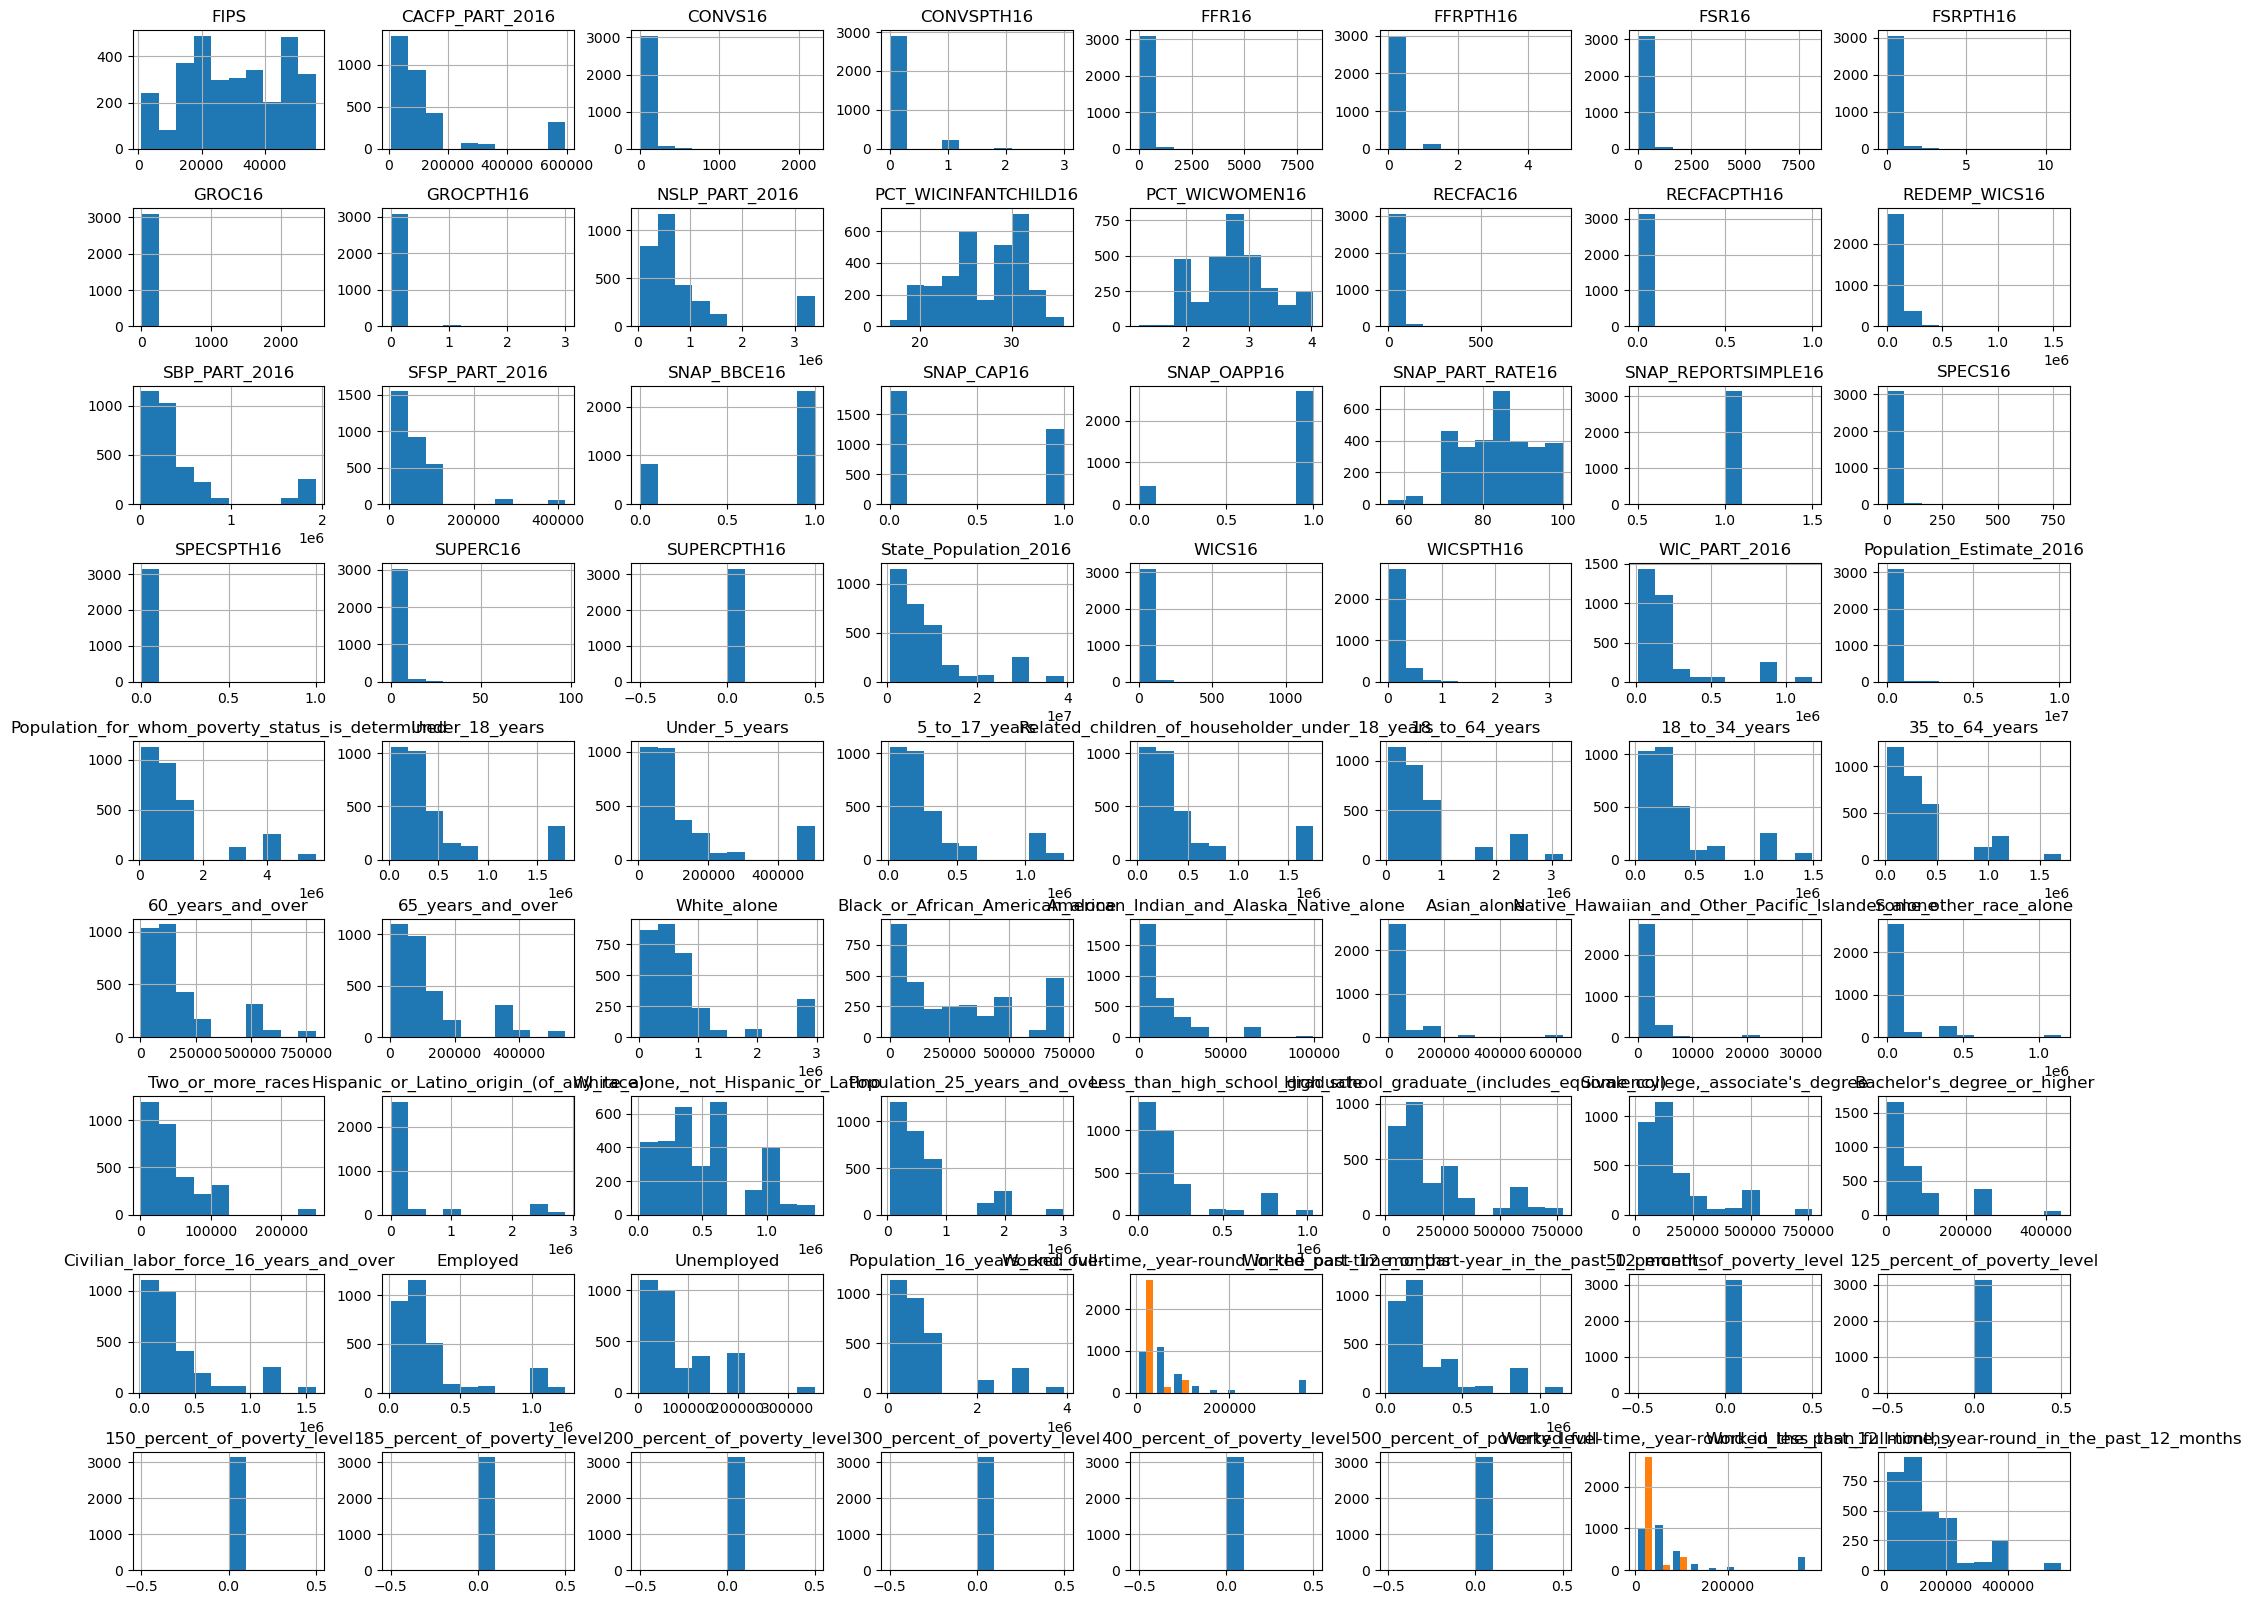

In [147]:
df_full.hist(figsize = (25,20))
plt.subplots_adjust(hspace=0.5);

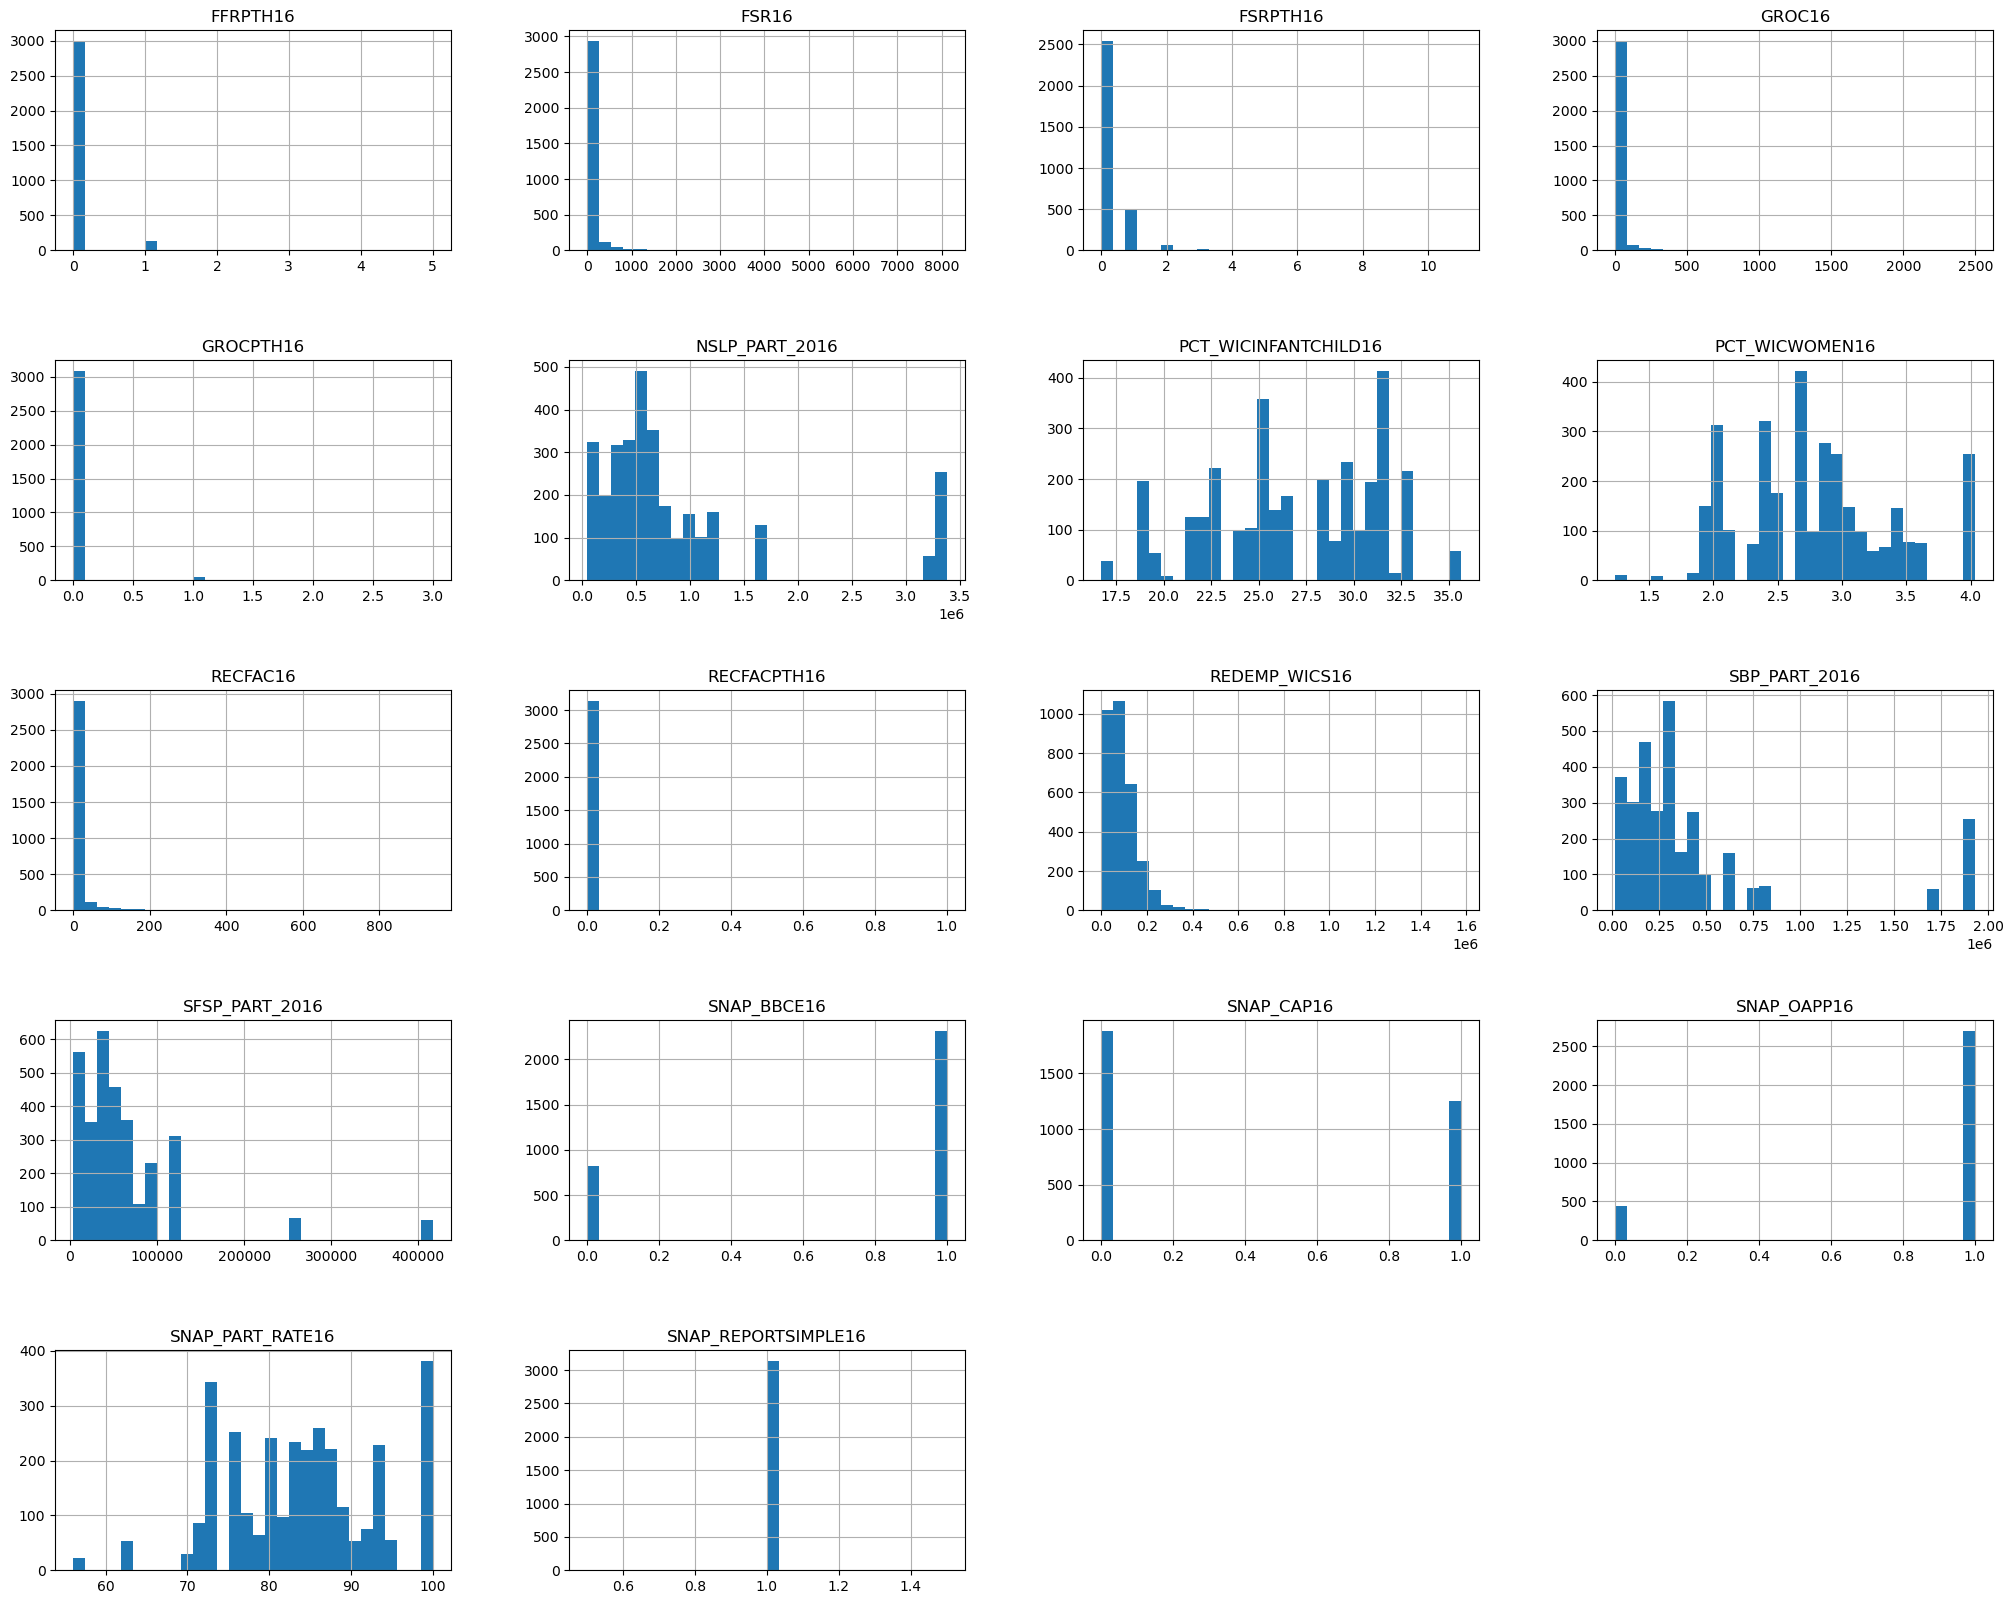

In [148]:
df_full.iloc[:,7:25].hist(figsize = (25,20),bins=30)
plt.subplots_adjust(hspace=0.5);

## Save data as csv

In [149]:
df_full.to_csv('clean_combined.csv', index=False)